In [1]:
rm(list=ls())

In [2]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,576475,30.8,1250435,66.8,1110232,59.3
Vcells,1078577,8.3,8388608,64.0,1820939,13.9


In [3]:
# install.packages("tidyverse") # sagemaker has
library(tidyverse)
# install.packages("parallel") # sagemaker has
library(parallel)
# install.packages("cluster") # sagemaker has
library(cluster)

install.packages("urca") # sagemaker doesn't have
library(urca)

install.packages("forecast") # sagemaker doesn't have
library(forecast)

install.packages("RcppArmadillo") # sagemaker doesn't have
library(RcppArmadillo)

install.packages("Metrics") # sagemaker doesn't have
library(Metrics)

install.packages("biglm") # sagemaker doesn't have
library(biglm)

install.packages("tseries") # sagemaker doesn't have
library(tseries)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘quadprog’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘RcppArmadillo’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    ac

# Read in and Subset Data

In [4]:
# Read in all files from the Data/Processed directory
england_fnames <- list.files("Data/Processed/Highways_England/", pattern="*.csv", full.names=TRUE)
england_df_list <- lapply(england_fnames, read_csv)

portland_fnames <- list.files("Data/Processed/Portland/", pattern="*.csv", full.names=TRUE)
portland_df_list <- lapply(portland_fnames, read_csv)

utah_fnames <- list.files("Data/Processed/Utah/", pattern="*.csv", full.names=TRUE)
utah_df_list <- lapply(utah_fnames, read_csv)

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ───────────────────────────────────────────────────────


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or s

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ───────────────────────────────────────────────────────


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or s

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ───────────────────────────────────────────────────────


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or s

Rows: 35040 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [5]:
england_df_list <- lapply(england_df_list, function(x) x %>% arrange(timestamp))
portland_df_list <- lapply(portland_df_list, function(x) x %>% arrange(timestamp))
utah_df_list <- lapply(utah_df_list, function(x) x %>% arrange(timestamp))    

In [6]:
total_df_list <- append(append(england_df_list, portland_df_list), utah_df_list)

In [7]:
set.seed(54321)
starting_points <- sample(1:((96*365)-(96*12*7)), 
                          length(total_df_list), 
                          replace=FALSE)
ending_points <- starting_points + (96*7*12) - 1

In [8]:
total_df_list <- lapply(total_df_list, function(x) x %>% mutate(rn = row_number()))

In [9]:
total_df_list_samples <- lapply(1:length(total_df_list), 
                                function(x) total_df_list[[x]] %>% 
                                    filter(rn >= starting_points[x]) %>%
                                    filter(rn <= ending_points[x]))

In [10]:
total_df_list_samples <- lapply(total_df_list_samples, 
                                function(x) x %>% mutate(rn = row_number()) %>%
                                    mutate(train_val_test = ifelse(rn <= (96*7*8), 
                                                                   "train", 
                                                                   ifelse(rn <= (96*7*10), 
                                                                          "val", 
                                                                          "test")))
                                
                               )

# Functions for Global AR Models

In [ ]:
difference <- function(data, lag=1){
    diff_data <- diff(data, lag=lag) #lapply(data, function(x) diff(x, lag=lag))                 
}

In [ ]:
inv_difference <- function(data, lag=1, initial_data=NULL) {
    if (is.null(initial_data)) {
        undiff <- diffinv(data, lag=lag, differences=1)
        
    }
    else {
        undiff <- diffinv(data, lag=lag, differences=1, xi=initial_data)
    }
}

In [11]:
diff_volume <- function(data, lag=1, ndiff=1){
    
    if (ndiff==1) {
        
    data <- data %>% mutate(lagged_total_volume = lag(total_volume, lag)) %>%
        mutate(original_total_volume = total_volume,
               total_volume = original_total_volume - lagged_total_volume)    
    }
    
    else if (ndiff==2) {    
        
        if (length(lag)==1) {
                
        data <- data %>% mutate(first_lagged_total_volume = lag(total_volume, lag)) %>%
            mutate(original_total_volume = total_volume,
                   total_volume = original_total_volume - first_lagged_total_volume)

        data <- data %>% mutate(second_lagged_total_volume = lag(total_volume, lag)) %>%
            mutate(first_differenced_total_volume=total_volume,
                   total_volume=first_differenced_total_volume-second_lagged_total_volume
                  )
        }
        
        else if (length(lag)==2) {
    
        data <- data %>% mutate(first_lagged_total_volume = lag(total_volume, lag[[1]])) %>%
            mutate(original_total_volume = total_volume,
                   total_volume = original_total_volume - first_lagged_total_volume)

        data <- data %>% mutate(second_lagged_total_volume = lag(total_volume, lag[[2]])) %>%
            mutate(first_differenced_total_volume=total_volume,
                   total_volume=first_differenced_total_volume-second_lagged_total_volume
                  )
        }
    }
    
    return_list <- list(data=data, lag=lag) 
}

In [12]:
lag_embed <- function(data, lag=1) {
    
    n_test <- nrow(data %>% filter(train_val_test=="test"))
    n_val <- nrow(data %>% filter(train_val_test=="val"))
    
    embed_mat <- embed(data$total_volume, (lag+1))
    n_mat <- nrow(embed_mat)
    
    test_idx <- rev(1:n_mat)[1:n_test]
    val_idx <- rev(1:n_mat)[-c(1:n_test)][1:n_val]
    
    train_mat <- embed_mat[-c(val_idx, test_idx),]
    val_mat <- embed_mat[val_idx,]
    test_mat <- embed_mat[test_idx,]
    
    return_list <- list("train"=train_mat, "val"=val_mat, "test"=test_mat)
}

In [13]:
global_ar_least_squares <- function(train_list,
                                    val_list,
                                    return_train_preds=TRUE,
                                    return_val_preds=TRUE,
                                    return_perf_metrics=TRUE
                                   ) 
{
        
    model_formula <- paste(colnames(train_list[[1]][2:ncol(train_list[[1]])]), collapse='+')   
    model_formula <- paste(paste(colnames(train_list[[1]][1]),model_formula,sep="~"), "1", sep="-")    

    big_lm_mod <- biglm(as.formula(model_formula), train_list[[1]])    
    for (ts in 2:length(train_list)){
        big_lm_mod <- update(big_lm_mod, train_list[[ts]])
    }     
    
    return_list <- list("model"=big_lm_mod)
    
    if (return_perf_metrics | return_train_preds) {
        train_preds <- data.frame()
        for (t in 1:length(train_list)) {
            pred <- data.frame(forec=predict(big_lm_mod, newdata=train_list[[t]]), ts_index=t)
            train_preds <- rbind(train_preds, pred)
        }
    }
    
    if (return_perf_metrics | return_val_preds) {
    val_preds <- data.frame()
        for (val_t in 1:length(val_list)) {
            val_pred <- data.frame(forec=predict(big_lm_mod, newdata=val_list[[val_t]]), ts_index=val_t)
            val_preds <- rbind(val_preds, val_pred)
        }
    }
    
    if (return_perf_metrics) {
        train_rmse_ls <- c()
        train_mae_ls <- c()
        for (idx in 1:length(train_list)) {
            rmse_i <- rmse(train_list[[idx]][,1], (train_preds %>% filter(ts_index==idx))$forec)
            train_rmse_ls <- c(train_rmse_ls, rmse_i)

            mae_i <- mae(train_list[[idx]][,1], (train_preds %>% filter(ts_index==idx))$forec)
            train_mae_ls <- c(train_mae_ls, mae_i)
        }

        val_rmse_ls <- c()
        val_mae_ls <- c()
        for (idx in 1:length(val_list)) {
            rmse_val_i <- rmse(val_list[[idx]][,1], (val_preds %>% filter(ts_index==idx))$forec)
            val_rmse_ls <- c(val_rmse_ls, rmse_val_i)

            mae_val_i <- mae(val_list[[idx]][,1], (val_preds %>% filter(ts_index==idx))$forec)
            val_mae_ls <- c(val_mae_ls, mae_val_i)
        }
        
        return_list <- append(return_list, list("train_rmse"=train_rmse_ls, "train_mae"=train_mae_ls,
                                                "val_rmse"=val_rmse_ls, "val_mae"=val_mae_ls))
    }
    

    if (return_train_preds) {
        return_list <- append(return_list, list("train_preds"=train_preds))
    }

    if (return_val_preds) {
        return_list <- append(return_list, list("val_preds"=val_preds))
    } 
        
    return_list                                           
}

In [14]:
global_ar_least_squares_pred <- function(model,
                                         test_list,
                                         return_preds=TRUE
                                        ) 
{
    big_lm_mod <- model
    
    test_preds <- data.frame()
    for (test_t in 1:length(test_list)) {
        test_pred <- data.frame(forec=predict(big_lm_mod, newdata=test_list[[test_t]]), ts_index=test_t)
        test_preds <- rbind(test_preds, test_pred)
    }

    test_rmse_ls <- c()
    test_mae_ls <- c()
    for (idx in 1:length(test_list)) {
        rmse_test_i <- rmse(test_list[[idx]][,1], (test_preds %>% filter(ts_index==idx))$forec)
        test_rmse_ls <- c(test_rmse_ls, rmse_test_i)
    
        mae_test_i <- mae(test_list[[idx]][,1], (test_preds %>% filter(ts_index==idx))$forec)
        test_mae_ls <- c(test_mae_ls, mae_test_i)
    }
    
    return_list <- list("test_rmse"=test_rmse_ls, "test_mae"=test_mae_ls)
    
    if (return_preds) {
        return_list <- append(return_list, list("test_preds"=test_preds))
    }
    
    return_list        
}

In [15]:
global_ar_least_squares_pred_undiff <- function(original_data_ls,
                                                diff_n=1,
                                                embed_lag=1,
                                                train_preds=NULL,
                                                val_preds=NULL,
                                                test_preds=NULL,
                                                return_rmse=TRUE,
                                                return_mae=TRUE
                                               )
{
    
    return_list <- list()
    
    if (!is.null(train_preds)) {    
        undiff_train_preds <- data.frame()

        train_rmse_ls <- c()
        train_mae_ls <- c()
        
        for (idx in 1:length(original_data_ls)) {
            
            xi <- original_data_ls[[idx]]$original_total_volume[c((embed_lag+1):(embed_lag+diff_n))]

            undiff_pred <- diffinv((train_preds %>% filter(ts_index==idx))$forec, 
                                   lag=diff_n, 
                                   xi=xi)

            undiff_pred_df <- data.frame(forec=undiff_pred, ts_index=idx)
            undiff_train_preds <- rbind(undiff_train_preds, undiff_pred_df)

            rmse_i <- rmse(undiff_pred[-c(1:diff_n)],
                           (original_data_ls[[idx]] %>% 
                                filter(train_val_test=="train"))$original_total_volume[-c(1:(diff_n+embed_lag))])
            train_rmse_ls <- c(train_rmse_ls, rmse_i)
            
            mae_i <- mae(undiff_pred[-c(1:diff_n)],
                           (original_data_ls[[idx]] %>% 
                                filter(train_val_test=="train"))$original_total_volume[-c(1:(diff_n+embed_lag))])
            train_mae_ls <- c(train_mae_ls, mae_i)

        }
           
        return_list <- append(return_list, list("undiff_train_preds"=undiff_train_preds))
        
        if (return_rmse) {
            return_list <- append(return_list, list("train_rmse"=train_rmse_ls))
        }
        
        if (return_mae) {
            return_list <- append(return_list, list("train_mae"=train_mae_ls))
        }
        
    }
    
    if (!is.null(val_preds)) {
        undiff_val_preds <- data.frame()
        
        val_rmse_ls <- c()
        val_mae_ls <- c()
        
        for (idx in 1:length(original_data_ls)) {
            
            xi_val <- tail((original_data_ls[[idx]] %>% 
                                filter(train_val_test=="train"))$original_total_volume, diff_n)
            
            undiff_pred_val <- diffinv((val_preds %>% filter(ts_index==idx))$forec, 
                                       lag=diff_n, 
                                       xi=xi_val)
            
            undiff_pred_val_df <- data.frame(forec=undiff_pred_val, ts_index=idx)
            undiff_val_preds <- rbind(undiff_val_preds, undiff_pred_val_df)
            
            rmse_val_i <- rmse(undiff_pred_val[-c(1:diff_n)],
                               (original_data_ls[[idx]] %>% 
                                    filter(train_val_test=="val"))$original_total_volume)
            val_rmse_ls <- c(val_rmse_ls, rmse_val_i)
            
            mae_val_i <- mae(undiff_pred_val[-c(1:diff_n)],
                               (original_data_ls[[idx]] %>% 
                                    filter(train_val_test=="val"))$original_total_volume)
            val_mae_ls <- c(val_mae_ls, mae_val_i)
        }
        
        return_list <- append(return_list, list("undiff_val_preds"=undiff_val_preds))
        
        if (return_rmse) {
            return_list <- append(return_list, list("val_rmse"=val_rmse_ls))
        }
        
        if (return_mae) {
            return_list <- append(return_list, list("val_mae"=val_mae_ls))
        }
    }
    
    if (!is.null(test_preds)) {
        undiff_test_preds <- data.frame()
        
        test_rmse_ls <- c()
        test_mae_ls <- c()
        
        for (idx in 1:length(original_data_ls)) {
            
            xi_test <- tail((original_data_ls[[idx]] %>% 
                                 filter(train_val_test=="val"))$original_total_volume, diff_n)
            
            undiff_pred_test <- diffinv((test_preds %>% filter(ts_index==idx))$forec, 
                                        lag=diff_n, 
                                        xi=xi_test)
            
            undiff_pred_test_df <- data.frame(forec=undiff_pred_test, ts_index=idx)
            undiff_test_preds <- rbind(undiff_test_preds, undiff_pred_test_df)
            
            rmse_test_i <- rmse(undiff_pred_test[-c(1:diff_n)],
                               (original_data_ls[[idx]] %>% 
                                    filter(train_test_test=="test"))$original_total_volume)
            test_rmse_ls <- c(test_rmse_ls, rmse_test_i)
            
            mae_test_i <- mae(undiff_pred_test[-c(1:diff_n)],
                               (original_data_ls[[idx]] %>% 
                                    filter(train_test_test=="test"))$original_total_volume)
            test_mae_ls <- c(test_mae_ls, mae_test_i)
        }
        
        return_list <- append(return_list, list("undiff_test_preds"=undiff_test_preds))
        
        if (return_rmse) {
            return_list <- append(return_list, list("test_rmse"=test_rmse_ls))
        }
        
        if (return_mae) {
            return_list <- append(return_list, list("test_mae"=test_mae_ls))
        }
    }
    
    return_list
}

# Deciding on the Best Differencing Scheme

In [201]:
set.seed(54321)
sample_idx <- sample(1:length(england_df_list), 1)

ts_sample <- total_df_list_samples[[sample_idx]] %>% filter(train_val_test=="train")

sample_highway_name <- str_split(ts_sample$site_name[1], '/')[[1]][1]
sample_sensor_name <- str_split(ts_sample$site_name[1], '/')[[1]][2]

In [222]:
original_ts_plot <- ggplot(ts_sample[(96*15):(96*36-1),]) + 
    geom_line(aes(x=timestamp, y=total_volume)) + 
    labs(y="15-minute Traffic Volume", x = "Timestamp") + 
    ggtitle(str_glue("3-Week Sample of 15-Minute Traffic Volume for the {sample_highway_name} at Sensor {sample_sensor_name}"))

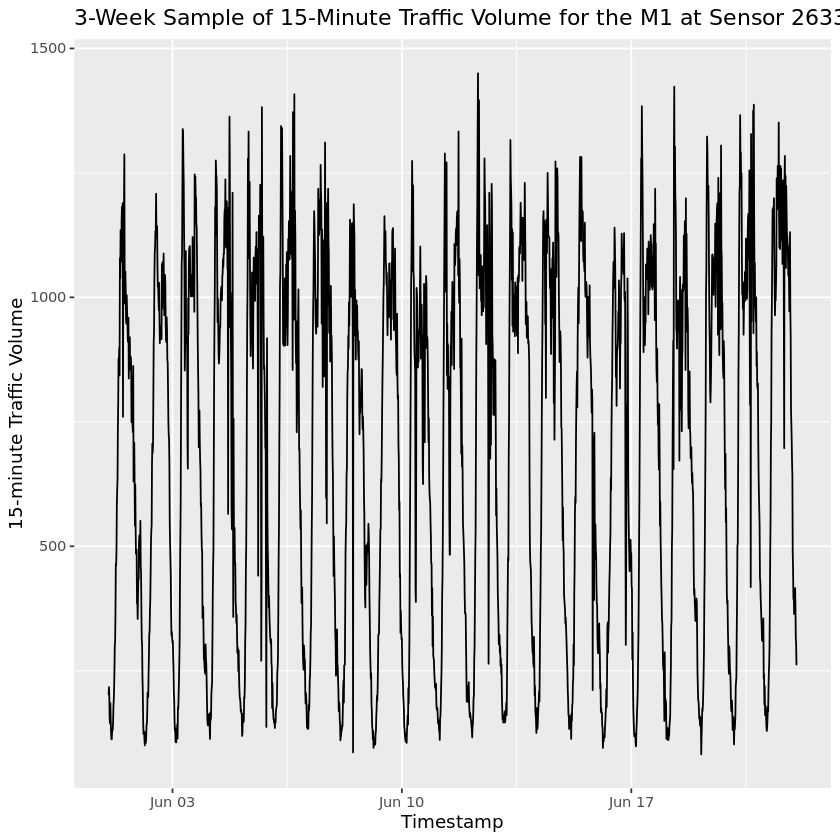

In [223]:
original_ts_plot

In [224]:
single_diff_ts_sample <- diff_volume(ts_sample)

In [225]:
single_diff_ts_plot <- ggplot(single_diff_ts_sample$data[(96*15):(96*36-1),]) + 
    geom_line(aes(x=timestamp, y=total_volume)) + 
    labs(y="Singly-Differenced 15-minute Traffic Volume", x = "Timestamp") + 
    ggtitle(str_glue("3-Week Sample of Singly-Differenced 15-Minute Traffic Volume for the {sample_highway_name} at Sensor {sample_sensor_name}"))

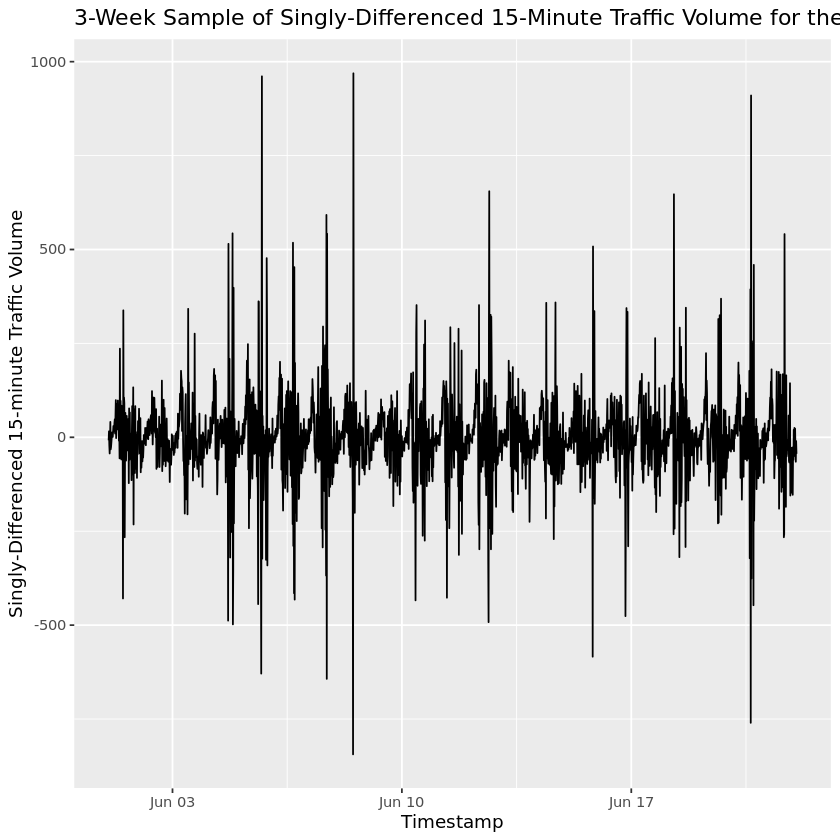

In [226]:
single_diff_ts_plot

In [230]:
weekly_diff_ts_sample <- diff_volume(ts_sample, lag=672)

In [231]:
weekly_diff_ts_plot <- ggplot(weekly_diff_ts_sample$data[(96*15):(96*36-1),]) + 
    geom_line(aes(x=timestamp, y=total_volume)) + 
    labs(y="Weekly-Differenced 15-minute Traffic Volume", x = "Timestamp") + 
    ggtitle(str_glue("3-Week Sample of Weekly-Differenced 15-Minute Traffic Volume for the {sample_highway_name} at Sensor {sample_sensor_name}"))

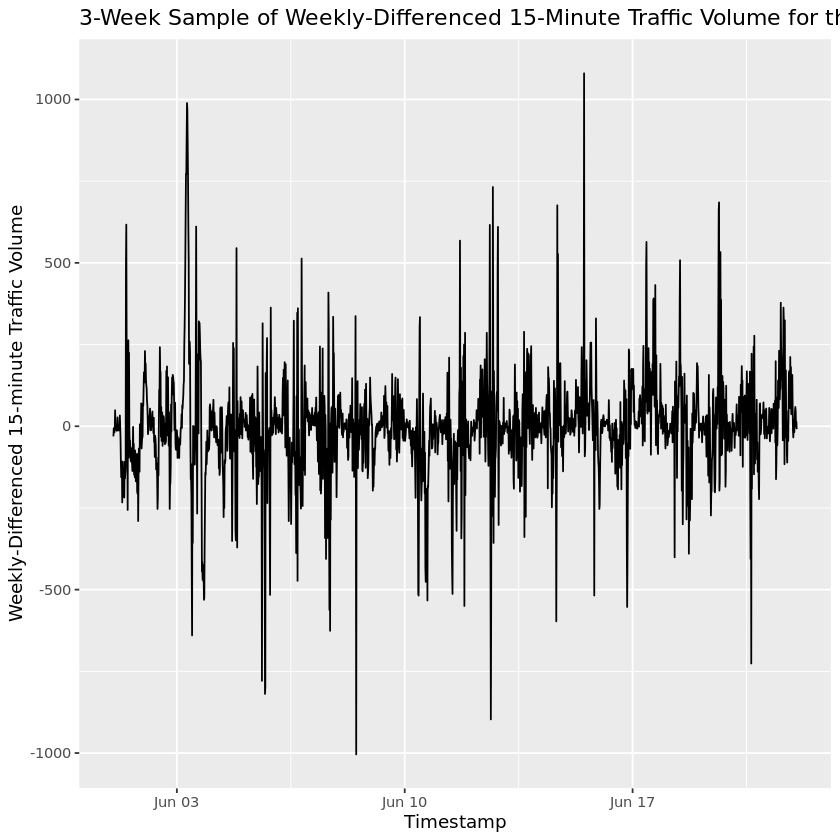

In [232]:
weekly_diff_ts_plot

Plots are really ambiguous, need something more definitive like portmanteau tests

In [422]:
total_df_list_samples_train <- lapply(total_df_list_samples, function(x) x %>% 
                                      filter(train_val_test=="train"))

In [423]:
kpss_cval <- ur.kpss(total_df_list_samples_train[[1]]$total_volume, use.lag=672)@cval[,1]

In [424]:
single_diff_train <- lapply(total_df_list_samples_train, function(x) diff_volume(x)$data)

In [425]:
single_diff_kpss <- lapply(single_diff_train, function(x)
    ur.kpss(x$total_volume, use.lag=672)@teststat
    )

In [426]:
mean(unlist(single_diff_kpss) < kpss_cval)

[1] 0.2763158

In [427]:
weekly_diff_train <- lapply(total_df_list_samples_train, function(x) diff_volume(x, 672)$data)

In [428]:
weekly_diff_kpss <- lapply(weekly_diff_train, function(x)
    ur.kpss(x$total_volume, use.lag=672)@teststat
    )

In [429]:
mean(unlist(weekly_diff_kpss) < kpss_cval)

[1] 0.9473684

According to the kpss test, weekly performed better than a single ordinary difference. Let's see if the ADF tests agree

In [431]:
adf_cval <- ur.df(total_df_list_samples_train[[1]]$total_volume, lags=672)@cval[,3]

In [432]:
single_diff_adf <- lapply(single_diff_train, function(x)
    ur.df(x$total_volume[-1], lags=672)@teststat
    )

In [433]:
mean(unlist(single_diff_adf) < adf_cval)

[1] 1

In [434]:
weekly_diff_adf <- lapply(weekly_diff_train, function(x)
    ur.df(x$total_volume[-c(1:672)], lags=672)@teststat
    )

In [435]:
mean(unlist(weekly_diff_adf) < adf_cval)

[1] 1

ADF does not agree with KPSS...Perhaps we should try both or look for a more complex differencing scheme (e.g., once weekly and once ordinary or twice ordinary)

In [300]:
double_diff_ts_samples <- diff_volume(single_diff_ts_sample$data)

In [301]:
double_diff_ts_plot <- ggplot(double_diff_ts_samples$data[(96*15):(96*36-1),]) + 
    geom_line(aes(x=timestamp, y=total_volume)) + 
    labs(y="Twice-Differenced 15-minute Traffic Volume", x = "Timestamp") + 
    ggtitle(str_glue("3-Week Sample of Twice-Differenced 15-Minute Traffic Volume for the {sample_highway_name} at Sensor {sample_sensor_name}"))

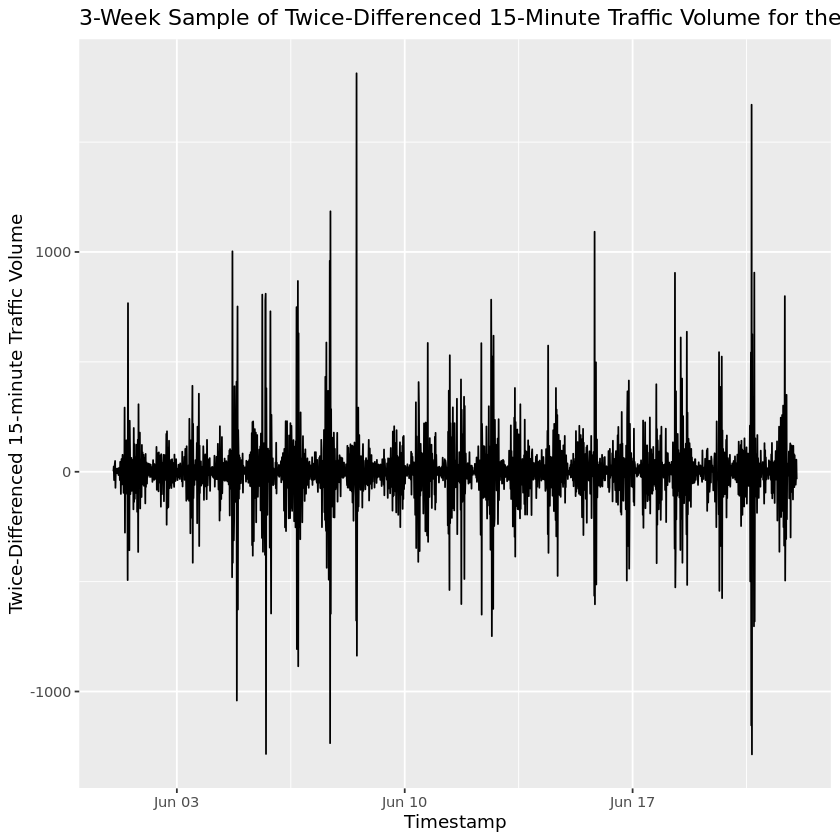

In [302]:
double_diff_ts_plot

In [436]:
twice_diff_train <- lapply(single_diff_train, function(x) diff_volume(x)$data)

In [437]:
twice_diff_kpss <- lapply(twice_diff_train, function(x)
    ur.kpss(x$total_volume, use.lag=672)@teststat
    )

In [438]:
mean(unlist(twice_diff_kpss) < kpss_cval)

[1] 1

In [439]:
twice_diff_adf <- lapply(twice_diff_train, function(x)
    ur.df(x$total_volume[-c(1:2)], lags=672)@teststat
    )

In [440]:
mean(unlist(twice_diff_adf) < adf_cval)

[1] 1

In [394]:
weekly_singly_diff_ts_sample <- diff_volume(weekly_diff_ts_sample$data)

In [395]:
weekly_singly_diff_ts_plot <- ggplot(weekly_singly_diff_ts_sample$data[(96*15):(96*36-1),]) + 
    geom_line(aes(x=timestamp, y=total_volume)) + 
    labs(y="Weekly & Singly-Differenced 15-minute Traffic Volume", x = "Timestamp") + 
    ggtitle(str_glue("3-Week Sample of Weekly & Singly-Differenced 15-Minute Traffic Volume for the {sample_highway_name} at Sensor {sample_sensor_name}"))

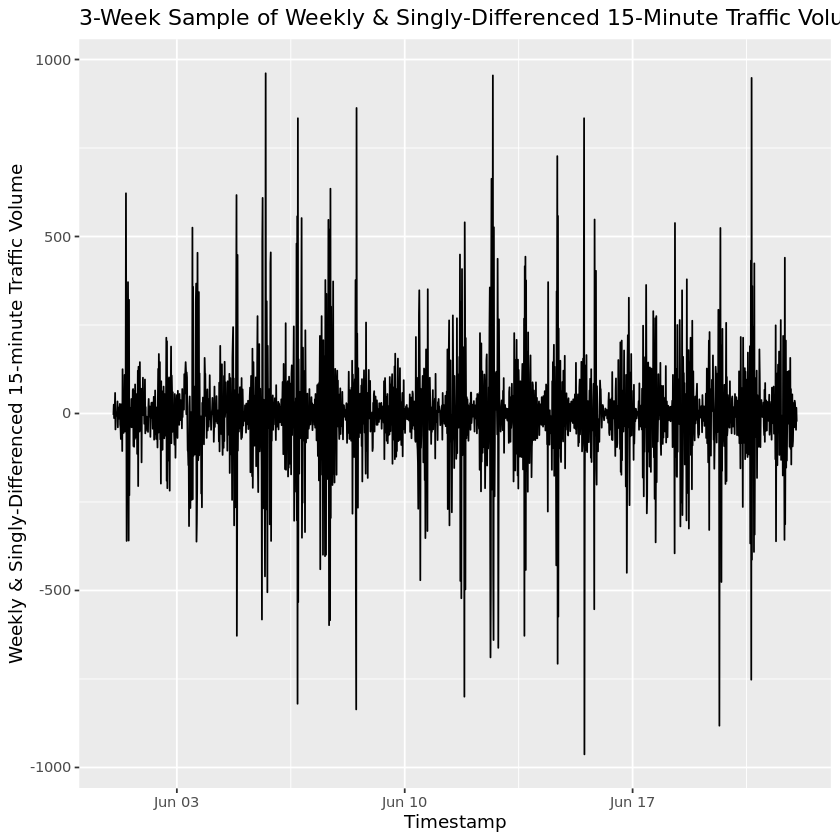

In [314]:
weekly_singly_diff_ts_plot

In [441]:
weekly_single_diff_train <- lapply(weekly_diff_train, function(x) diff_volume(x)$data)

In [442]:
weekly_single_diff_kpss <- lapply(weekly_single_diff_train, function(x)
    ur.kpss(x$total_volume, use.lag=672)@teststat
    )

In [443]:
mean(unlist(weekly_single_diff_kpss) < kpss_cval)

[1] 1

In [444]:
weekly_single_diff_adf <- lapply(weekly_single_diff_train, function(x)
    ur.df(x$total_volume[-c(1:(672+1))], lags=672)@teststat
    )

In [445]:
mean(unlist(weekly_single_diff_adf) < adf_cval)

[1] 0.8289474

Combination of both tests reveal that applying an ordinary difference twice results in the most consistent results for stationarity

# Test for Double Difference

In [16]:
diff_n <- 1
twice_diff_df_list <- lapply(total_df_list_samples, function(x) diff_volume(x, lag=diff_n, ndiff=2)$data)

In [17]:
lag <- 96

In [18]:
embed_mat_list <- lapply(twice_diff_df_list,
                         function(x) lag_embed(x, lag=lag))
embed_train_list <- lapply(embed_mat_list,
                           function(x) data.frame(x$train))
embed_val_list <- lapply(embed_mat_list,
                         function(x) data.frame(x$val))    

In [19]:
ar_mod <- global_ar_least_squares(embed_train_list, embed_val_list, TRUE, TRUE, FALSE)

In [20]:
ar_mod_train_preds_1 <- (ar_mod$train_preds %>% filter(ts_index==1))$forec

In [21]:
original_data <- twice_diff_df_list[[1]]

In [22]:
head(original_data)

site_name,day_of_week,date,day_of_year,timestamp,interval_of_day,avg_mph,total_volume,missing_speed,missing_volume,rn,train_val_test,first_lagged_total_volume,original_total_volume,second_lagged_total_volume,first_differenced_total_volume
<chr>,<dbl>,<date>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
6310/1,2,2019-05-01,121,2019-05-01 14:59:00,59,66,NA,FALSE,FALSE,1,train,NA,306,NA,NA
6310/1,2,2019-05-01,121,2019-05-01 15:14:00,60,64,NA,FALSE,FALSE,2,train,306,340,NA,34
6310/1,2,2019-05-01,121,2019-05-01 15:29:00,61,68,-77,FALSE,FALSE,3,train,340,297,34,-43
6310/1,2,2019-05-01,121,2019-05-01 15:44:00,62,67,67,FALSE,FALSE,4,train,297,321,-43,24
6310/1,2,2019-05-01,121,2019-05-01 15:59:00,63,66,-10,FALSE,FALSE,5,train,321,335,24,14
6310/1,2,2019-05-01,121,2019-05-01 16:14:00,64,65,-49,FALSE,FALSE,6,train,335,300,14,-35


In [27]:
original_data_train <- original_data %>% 
    filter(train_val_test=="train") %>%
    mutate(forec=c(rep(NA, 98),ar_mod_train_preds_1))

In [31]:
head(original_data_train)

site_name,day_of_week,date,day_of_year,timestamp,interval_of_day,avg_mph,total_volume,missing_speed,missing_volume,rn,train_val_test,first_lagged_total_volume,original_total_volume,second_lagged_total_volume,first_differenced_total_volume,forec
<chr>,<dbl>,<date>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6310/1,2,2019-05-01,121,2019-05-01 14:59:00,59,66,NA,FALSE,FALSE,1,train,NA,306,NA,NA,NA
6310/1,2,2019-05-01,121,2019-05-01 15:14:00,60,64,NA,FALSE,FALSE,2,train,306,340,NA,34,NA
6310/1,2,2019-05-01,121,2019-05-01 15:29:00,61,68,-77,FALSE,FALSE,3,train,340,297,34,-43,NA
6310/1,2,2019-05-01,121,2019-05-01 15:44:00,62,67,67,FALSE,FALSE,4,train,297,321,-43,24,NA
6310/1,2,2019-05-01,121,2019-05-01 15:59:00,63,66,-10,FALSE,FALSE,5,train,321,335,24,14,NA
6310/1,2,2019-05-01,121,2019-05-01 16:14:00,64,65,-49,FALSE,FALSE,6,train,335,300,14,-35,NA


In [52]:
rmse(original_data_train$original_total_volume[-c(1:98)],    
    cumsum(c(315, -6, na.omit(original_data_train$forec)))[-c(1:2)])

[1] 251.7146

In [59]:
cor(original_data_train$total_volume, original_data_train$forec,use="pairwise.c")^2

[1] 0.61645

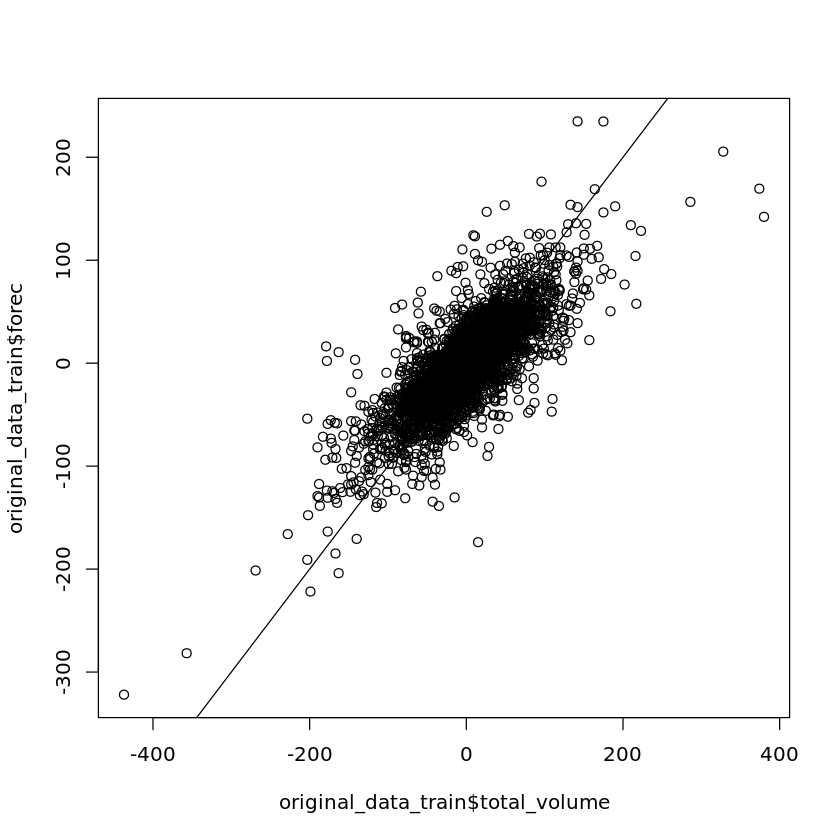

In [55]:
plot(original_data_train$total_volume, original_data_train$forec)
abline(a=0,b=1)

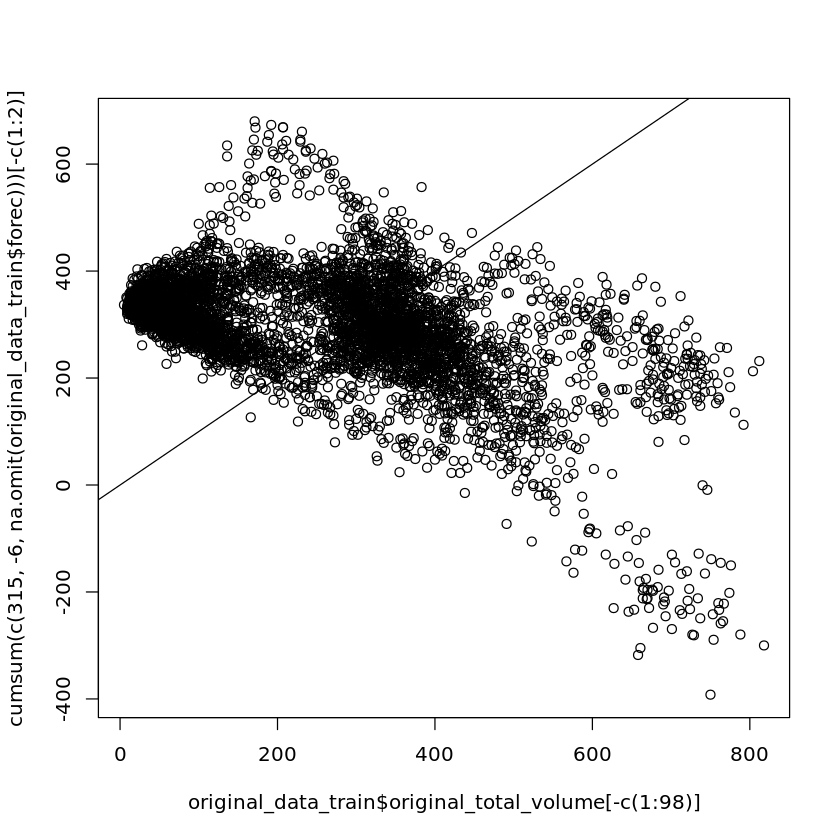

In [60]:
plot(original_data_train$original_total_volume[-c(1:98)],    
    cumsum(c(315, -6, na.omit(original_data_train$forec)))[-c(1:2)])
abline(a=0,b=1)

In [62]:
diffinv(c(na.omit(original_data_train$forec)), 
        lag=1, 
        diff=2,
       xi=original_data_train$original_total_volume[c(96,97)])

[1]  3.150000e+02  3.090000e+02  2.764106e+02  2.605928e+02  2.115284e+02
   [6]  1.276620e+02  7.559581e+01 -3.148891e+01 -9.220422e+01 -1.249822e+02
  [11] -1.378114e+02 -1.678092e+02 -2.445362e+02 -3.468240e+02 -4.061735e+02
  [16] -4.600426e+02 -5.386121e+02 -6.039195e+02 -7.044776e+02 -8.258413e+02
  [21] -9.009369e+02 -9.559794e+02 -1.018473e+03 -1.052518e+03 -1.080871e+03
  [26] -1.139678e+03 -1.202288e+03 -1.265078e+03 -1.281505e+03 -1.281803e+03
  [31] -1.292636e+03 -1.319215e+03 -1.337872e+03 -1.340214e+03 -1.365603e+03
  [36] -1.383035e+03 -1.399339e+03 -1.395497e+03 -1.382793e+03 -1.363515e+03
  [41] -1.361265e+03 -1.344024e+03 -1.339762e+03 -1.325025e+03 -1.298778e+03
  [46] -1.274663e+03 -1.235356e+03 -1.205080e+03 -1.156519e+03 -1.113281e+03
  [51] -1.077192e+03 -1.049637e+03 -1.008327e+03 -9.573325e+02 -9.385739e+02
  [56] -9.167678e+02 -8.380531e+02 -7.640793e+02 -6.903139e+02 -6.184144e+02
  [61] -5.620418e+02 -4.592285e+02 -3.840867e+02 -2.485840e+02 -1.895027e+02
  [66] -1.410737e+02 -1.625891e+02 -1.893635e+02 -1.914054e+02 -1.968883e+02
  [71] -1.960544e+02 -2.301918e+02 -2.998960e+02 -3.853007e+02 -4.132036e+02
  [76] -4.523956e+02 -5.307433e+02 -6.267091e+02 -6.498462e+02 -7.763631e+02
  [81] -8.617580e+02 -9.921775e+02 -1.146293e+03 -1.228874e+03 -1.420179e+03
  [86] -1.566375e+03 -1.670584e+03 -1.734555e+03 -1.796036e+03 -1.842983e+03
  [91] -1.961712e+03 -2.034757e+03 -2.110891e+03 -2.182450e+03 -2.254385e+03
  [96] -2.307908e+03 -2.369922e+03 -2.464010e+03 -2.493835e+03 -2.524873e+03
 [101] -2.509509e+03 -2.508708e+03 -2.547670e+03 -2.606717e+03 -2.652514e+03
 [106] -2.766828e+03 -2.865451e+03 -2.946929e+03 -3.041229e+03 -3.117927e+03
 [111] -3.211402e+03 -3.298330e+03 -3.400887e+03 -3.526728e+03 -3.605279e+03
 [116] -3.676850e+03 -3.732377e+03 -3.802139e+03 -3.877983e+03 -3.930831e+03
 [121] -3.947604e+03 -3.926875e+03 -3.970451e+03 -4.054009e+03 -4.106245e+03
 [126] -4.133406e+03 -4.163751e+03 -4.182408e+03 -4.176292e+03 -4.213046e+03
 [131] -4.223833e+03 -4.250735e+03 -4.273910e+03 -4.291459e+03 -4.288594e+03
 [136] -4.310120e+03 -4.304282e+03 -4.284545e+03 -4.284962e+03 -4.265470e+03
 [141] -4.234672e+03 -4.208228e+03 -4.169124e+03 -4.132658e+03 -4.055364e+03
 [146] -3.971061e+03 -3.889719e+03 -3.821302e+03 -3.730499e+03 -3.627953e+03
 [151] -3.533788e+03 -3.446226e+03 -3.344355e+03 -3.230531e+03 -3.117567e+03
 [156] -3.003748e+03 -2.865711e+03 -2.687922e+03 -2.491080e+03 -2.250675e+03
 [161] -1.964629e+03 -1.637820e+03 -1.309317e+03 -1.000642e+03 -6.737725e+02
 [166] -4.009111e+02 -1.528399e+02  1.358516e+01  1.379349e+02  2.030603e+02
 [171]  2.767513e+02  2.488719e+02  2.153272e+02  1.927245e+02  1.961654e+02
 [176]  1.087479e+02  6.714797e+01  4.001427e+01  3.304820e+00 -2.378693e+00
 [181] -7.607478e+01 -1.212315e+02 -1.289951e+02 -1.587726e+02 -1.582041e+02
 [186] -1.929736e+02 -1.935871e+02 -1.751497e+02 -1.237536e+02 -1.092175e+02
 [191] -2.640385e+01  2.161596e+01  9.523217e+01  1.276132e+02  1.720761e+02
 [196]  2.436550e+02  3.069067e+02  4.007727e+02  4.096060e+02  4.390535e+02
 [201]  4.673067e+02  4.476285e+02  5.002308e+02  4.839075e+02  4.777240e+02
 [206]  4.610119e+02  4.099227e+02  3.265573e+02  3.396619e+02  3.056305e+02
 [211]  3.208279e+02  3.467709e+02  3.847237e+02  4.053925e+02  3.995076e+02
 [216]  3.955729e+02  4.029425e+02  4.375353e+02  4.604965e+02  4.757269e+02
 [221]  4.693792e+02  4.620810e+02  4.607797e+02  4.352259e+02  4.525220e+02
 [226]  4.674325e+02  4.532075e+02  4.574699e+02  4.735910e+02  4.670899e+02
 [231]  4.708114e+02  4.691721e+02  4.654071e+02  4.800832e+02  4.909629e+02
 [236]  5.050138e+02  5.412142e+02  5.620608e+02  5.888037e+02  6.097053e+02
 [241]  6.286045e+02  6.504087e+02  6.712583e+02  6.825770e+02  6.894045e+02
 [246]  7.092046e+02  7.256506e+02  7.477721e+02  7.829975e+02  8.208300e+02
 [251]  8.466092e+02  8.764032e+02  9.299026e+02  1.008577e+03  1.082751e+03
 [256]  1.141354e+03  1.215330e+03  1.309275e+03  1.392857e+03  1.485324e+03

In [48]:
original_data_train$original_total_volume[96]

[1] 315

In [45]:
diffinv(diffinv(c(na.omit(original_data_train$forec)), 
        lag=1, 
        xi=(original_data_train$first_differenced_total_volume[96]))[-c(1)],
        1,
        xi=315)

[1]     315.00000     253.41057     208.59281     130.52844      17.66203
   [6]     -63.40419    -199.48891    -289.20422    -350.98218    -392.81138
  [11]    -451.80915    -557.53615    -688.82400    -777.17348    -860.04257
  [16]    -967.61207   -1061.91949   -1191.47763   -1341.84131   -1445.93692
  [21]   -1529.97937   -1621.47332   -1684.51791   -1741.87098   -1829.67803
  [26]   -1921.28795   -2013.07782   -2058.50480   -2087.80262   -2127.63585
  [31]   -2183.21541   -2230.87229   -2262.21362   -2316.60289   -2363.03519
  [36]   -2408.33917   -2433.49683   -2449.79294   -2459.51519   -2486.26487
  [41]   -2498.02363   -2522.76205   -2537.02514   -2539.77756   -2544.66273
  [46]   -2534.35590   -2533.07971   -2513.51861   -2499.28089   -2492.19229
  [51]   -2493.63718   -2481.32737   -2459.33247   -2469.57395   -2476.76776
  [56]   -2427.05308   -2382.07927   -2337.31395   -2294.41438   -2267.04183
  [61]   -2193.22851   -2147.08665   -2040.58402   -2010.50268   -1991.07369
  [66]   -2041.58913   -2097.36346   -2128.40536   -2162.88829   -2191.05443
  [71]   -2254.19176   -2352.89602   -2467.30065   -2524.20356   -2592.39564
  [76]   -2699.74331   -2824.70914   -2876.84619   -3032.36312   -3146.75804
  [81]   -3306.17750   -3489.29281   -3600.87373   -3821.17901   -3996.37481
  [86]   -4129.58385   -4222.55497   -4313.03593   -4388.98341   -4536.71199
  [91]   -4638.75724   -4743.89130   -4844.44962   -4945.38516   -5027.90775
  [96]   -5118.92155   -5242.00954   -5300.83547   -5360.87261   -5374.50853
 [101]   -5402.70799   -5470.66983   -5558.71750   -5633.51385   -5776.82790
 [106]   -5904.45120   -6014.92851   -6138.22863   -6243.92720   -6366.40191
 [111]   -6482.33017   -6613.88745   -6768.72785   -6876.27874   -6976.84951
 [116]   -7061.37725   -7160.13945   -7264.98339   -7346.83134   -7392.60364
 [121]   -7400.87549   -7473.45074   -7586.00922   -7667.24500   -7723.40563
 [126]   -7782.75088   -7830.40800   -7853.29230   -7919.04562   -7958.83317
 [131]   -8014.73495   -8066.91048   -8113.45927   -8139.59410   -8190.11952
 [136]   -8213.28219   -8222.54535   -8251.96216   -8261.46963   -8259.67185
 [141]   -8262.22780   -8252.12383   -8244.65802   -8196.36378   -8141.06104
 [146]   -8088.71914   -8049.30213   -7987.49860   -7913.95319   -7848.78761
 [151]   -7790.22585   -7717.35528   -7632.53078   -7548.56708   -7463.74798
 [156]   -7354.71073   -7205.92232   -7038.08045   -6826.67475   -6569.62928
 [161]   -6271.81959   -5972.31690   -5692.64237   -5394.77250   -5150.91112
 [166]   -4931.83992   -4794.41484   -4699.06506   -4662.93967   -4618.24872
 [171]   -4675.12806   -4737.67284   -4789.27554   -4814.83461   -4931.25208
 [176]   -5001.85203   -5057.98573   -5123.69518   -5158.37869   -5261.07478
 [181]   -5335.23153   -5371.99515   -5430.77257   -5459.20410   -5522.97356
 [186]   -5552.58711   -5563.14973   -5540.75359   -5555.21750   -5501.40385
 [191]   -5482.38404   -5437.76783   -5434.38676   -5418.92391   -5376.34505
 [196]   -5342.09332   -5277.22735   -5297.39397   -5296.94646   -5297.69329
 [201]   -5346.37146   -5322.76924   -5368.09255   -5403.27599   -5448.98813
 [206]   -5529.07725   -5641.44267   -5657.33815   -5720.36952   -5734.17206
 [211]   -5737.22914   -5728.27634   -5736.60748   -5771.49242   -5804.42710
 [216]   -5826.05752   -5820.46468   -5826.50347   -5840.27313   -5875.62079
 [221]   -5911.91897   -5942.22030   -5996.77412   -6008.47801   -6022.56747
 [226]   -6065.79249   -6090.53014   -6103.40901   -6138.91007   -6164.18856
 [231]   -6194.82788   -6227.59290   -6241.91677   -6260.03714   -6274.98617
 [236]   -6267.78575   -6275.93922   -6278.19627   -6286.29470   -6296.39551
 [241]   -6303.59128   -6311.74169   -6329.42297   -6351.59547   -6360.79538
 [246]   -6373.34938   -6380.22795   -6374.00246   -6365.17000   -6368.39083
 [251]   -6367.59678   -6343.09741   -6293.42283   -6248.24873   -6218.64588
 [256]   -6173.66953   -6108.72538   -6054.14283   -5990.67642   -5912.73202

In [35]:
na.omit(original_data_train$forec)

[1] -2.658943e+01  1.677168e+01 -3.324662e+01 -3.480202e+01  3.180018e+01
   [6] -5.501850e+01  4.636941e+01  2.793735e+01  1.994876e+01 -1.716857e+01
  [11] -4.672923e+01 -2.556085e+01  4.293836e+01  5.480401e+00 -2.470042e+01
  [16]  1.326208e+01 -3.525072e+01 -2.080554e+01  4.626808e+01  2.005314e+01
  [21] -7.451486e+00  2.844935e+01  5.691529e+00 -3.045398e+01 -3.802874e+00
  [26] -1.799525e-01  4.636289e+01  1.612917e+01 -1.053542e+01 -1.574633e+01
  [31]  7.922672e+00  1.631555e+01 -2.304793e+01  7.956955e+00  1.128333e+00
  [36]  2.014631e+01  8.861543e+00  6.573868e+00 -1.702743e+01  1.499091e+01
  [41] -1.297965e+01  1.047533e+01  1.151067e+01 -2.132756e+00  1.519200e+01
  [46] -9.030633e+00  1.828491e+01 -5.323386e+00 -7.149117e+00 -8.533488e+00
  [51]  1.375470e+01  9.685081e+00 -3.223637e+01  3.047660e+00  5.690850e+01
  [56] -4.740869e+00 -2.084927e-01 -1.865754e+00 -1.552702e+01  4.644077e+01
  [61] -2.767146e+01  6.036077e+01 -7.642130e+01 -1.065234e+01 -6.994442e+01
  [66] -5.258896e+00  2.473243e+01 -3.441028e+00  6.316782e+00 -3.497118e+01
  [71] -3.556693e+01 -1.570037e+01  5.750172e+01 -1.128917e+01 -3.915559e+01
  [76] -1.761816e+01  7.282878e+01 -1.033799e+02  4.112200e+01 -4.502454e+01
  [81] -2.369585e+01  7.153439e+01 -1.087244e+02  4.510949e+01  4.198675e+01
  [86]  4.023792e+01  2.490169e+00  1.453347e+01 -7.178110e+01  4.568333e+01
  [91] -3.088811e+00  4.575741e+00 -3.772115e-01  1.841294e+01 -8.491214e+00
  [96] -3.207418e+01  6.426205e+01 -1.211203e+00  4.640121e+01 -1.456354e+01
 [101] -3.976239e+01 -2.008582e+01  1.325132e+01 -6.851770e+01  1.569075e+01
 [106]  1.714600e+01 -1.282281e+01  1.760155e+01 -1.677614e+01  6.546440e+00
 [111] -1.562901e+01 -2.328313e+01  4.728951e+01  6.980118e+00  1.604303e+01
 [116] -1.423445e+01 -6.081752e+00  2.299600e+01  3.607565e+01  3.750045e+01
 [121] -6.430340e+01 -3.998322e+01  3.132268e+01  2.507516e+01 -3.184628e+00
 [126]  1.168813e+01  2.477283e+01 -4.286902e+01  2.596576e+01 -1.611423e+01
 [131]  3.726254e+00  5.626740e+00  2.041395e+01 -2.439058e+01  2.736274e+01
 [136]  1.389952e+01 -2.015365e+01  1.990933e+01  1.130525e+01 -4.353735e+00
 [141]  1.265992e+01 -2.638158e+00  4.082843e+01  7.008489e+00 -2.960833e+00
 [146] -1.292489e+01  2.238652e+01  1.174188e+01 -8.379833e+00 -6.603816e+00
 [151]  1.430881e+01  1.195392e+01 -8.607884e-01  8.553905e-01  2.421816e+01
 [156]  3.975115e+01  1.905346e+01  4.356384e+01  4.563976e+01  4.076422e+01
 [161]  1.693007e+00 -1.982817e+01  1.819535e+01 -5.400850e+01 -2.479018e+01
 [166] -8.164612e+01 -4.207531e+01 -5.922438e+01  8.565554e+00 -1.015703e+02
 [171] -5.665439e+00  1.094208e+01  2.604363e+01 -9.085840e+01  4.581752e+01
 [176]  1.446625e+01 -9.575753e+00  3.102594e+01 -6.801257e+01  2.853933e+01
 [181]  3.739314e+01 -2.201381e+01  3.034589e+01 -3.533792e+01  3.415591e+01
 [186]  1.905093e+01  3.295876e+01 -3.686005e+01  6.827756e+01 -3.479385e+01
 [191]  2.559640e+01 -4.123514e+01  1.208177e+01  2.711602e+01 -8.327136e+00
 [196]  3.061424e+01 -8.503259e+01  2.061412e+01 -1.194333e+00 -4.793134e+01
 [201]  7.228039e+01 -6.892553e+01  1.013986e+01 -1.052869e+01 -3.437699e+01
 [206] -3.227630e+01  9.646995e+01 -4.713590e+01  4.922884e+01  1.074545e+01
 [211]  1.200989e+01 -1.728395e+01 -2.655379e+01  1.950251e+00  1.130427e+01
 [216]  2.722326e+01 -1.163164e+01 -7.730869e+00 -2.157800e+01 -9.505222e-01
 [221]  5.996859e+00 -2.425249e+01  4.284993e+01 -2.385571e+00 -2.913555e+01
 [226]  1.848737e+01  1.185877e+01 -2.262218e+01  1.022256e+01 -5.360825e+00
 [231] -2.125704e+00  1.844115e+01 -3.796502e+00  3.171345e+00  2.214944e+01
 [236] -1.535389e+01  5.896420e+00 -5.841382e+00 -2.002378e+00  2.905040e+00
 [241] -9.546394e-01 -9.530872e+00 -4.491216e+00  1.297259e+01 -3.354097e+00
 [246]  5.675441e+00  1.310405e+01  2.606976e+00 -1.205329e+01  4.014878e+00
 [251]  2.370532e+01  2.517521e+01 -4.500483e+00 -1.557124e+01  1.537349e+01
 [256]  1.996781e+01 -1.036160e+01  8.883852e+00  1.447800e+01 -7.197016e+00

In [588]:
t <- diff(original_data$original_total_volume, lag=1, differences=2)

In [601]:
t_inv <- diffinv(
    diffinv(t,
                         lag=1,
                         xi=na.omit(original_data$first_differenced_total_volume)[1]) ,
                 lag=1,
                 xi=original_data$original_total_volume[1])

In [603]:
mean(t_inv==original_data$original_total_volume)

[1] 1

In [628]:
xi1 <- original_data$first_differenced_total_volume[c((embed_lag):(embed_lag-1+diff_n[2]))]

In [629]:
original_data$total_volume[95:98]

[1]  33 -75  29  29

In [630]:
xi1

[1] -54

In [617]:
head(embed_train_list[[1]])

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,29,-75,33,37,-61,35,-8,39,-81,34,⋯,32,-9,-2,49,-49,-10,67,-77,NA,NA
2,29,29,-75,33,37,-61,35,-8,39,-81,⋯,-28,32,-9,-2,49,-49,-10,67,-77,NA
3,-38,29,29,-75,33,37,-61,35,-8,39,⋯,-39,-28,32,-9,-2,49,-49,-10,67,-77
4,47,-38,29,29,-75,33,37,-61,35,-8,⋯,28,-39,-28,32,-9,-2,49,-49,-10,67
5,-1,47,-38,29,29,-75,33,37,-61,35,⋯,-52,28,-39,-28,32,-9,-2,49,-49,-10
6,-51,-1,47,-38,29,29,-75,33,37,-61,⋯,30,-52,28,-39,-28,32,-9,-2,49,-49


In [605]:
xi2 <- na.omit(original_data$original_total_volume)[c((embed_lag+1):(embed_lag+diff_n[1]))]

In [606]:
diffinv(diffinv(ar_mod_train_preds_1, lag=diff_n[2], xi=xi1)[-c(1)], lag=diff_n[1], xi=xi2)

[1]     543.00000     473.46060     386.89857     342.99541     278.42012
   [6]     197.17373     123.82348      28.40197     -56.69753    -100.37571
  [11]    -151.76730    -172.27736    -197.24538    -254.05106    -303.86054
  [16]    -338.69340    -377.32318    -416.92326    -447.46000    -490.95545
  [21]    -534.33132    -608.94024    -697.56245    -785.86123    -868.17637
  [26]    -923.67415    -970.37583   -1041.23706   -1086.35664   -1138.96465
  [31]   -1190.41243   -1243.04853   -1303.01122   -1368.80989   -1429.32101
  [36]   -1501.57441   -1559.45580   -1617.60444   -1681.39215   -1732.83993
  [41]   -1791.03779   -1861.55445   -1926.31247   -1997.30023   -2062.00902
  [46]   -2135.80228   -2208.35799   -2280.36528   -2364.98671   -2442.90729
  [51]   -2522.38884   -2577.41552   -2651.97522   -2728.30672   -2811.01565
  [56]   -2898.89255   -3039.63076   -3155.28115   -3237.91972   -3327.20993
  [61]   -3451.90973   -3644.00446   -3843.58738   -3984.91603   -4087.67111
  [66]   -4202.41459   -4340.40349   -4427.89357   -4459.94903   -4496.06866
  [71]   -4503.83804   -4451.56022   -4445.90003   -4430.22709   -4446.82090
  [76]   -4517.03526   -4558.13293   -4606.12138   -4615.13528   -4717.51793
  [81]   -4794.01103   -4835.67129   -4878.02763   -4938.28567   -5015.06018
  [86]   -5122.57551   -5178.40369   -5235.03361   -5299.84084   -5389.47561
  [91]   -5443.68662   -5504.56343   -5605.44826   -5659.04050   -5707.72504
  [96]   -5790.25821   -5853.40602   -5939.73610   -6042.78651   -6104.94289
 [101]   -6210.06765   -6273.54585   -6314.98112   -6362.42812   -6421.37130
 [106]   -6499.03879   -6566.35618   -6582.14825   -6606.04752   -6659.25317
 [111]   -6689.71956   -6741.77915   -6805.04653   -6822.80033   -6845.06130
 [116]   -6902.71074   -6952.47100   -7012.35638   -7106.61070   -7192.13208
 [121]   -7262.40263   -7296.69403   -7336.78634   -7400.44751   -7471.23839
 [126]   -7528.10025   -7574.28161   -7645.61394   -7708.95865   -7768.17603
 [131]   -7818.87849   -7869.92552   -7925.17022   -7995.46190   -8052.59798
 [136]   -8121.87013   -8188.49142   -8249.15021   -8319.34344   -8383.67957
 [141]   -8459.06190   -8524.41756   -8597.46550   -8681.93927   -8765.89270
 [146]   -8832.83743   -8893.91810   -8987.52555   -9075.38132   -9118.58839
 [151]   -9193.07078   -9290.70710   -9389.51062   -9498.22124   -9577.23866
 [156]   -9703.00024   -9807.35136   -9976.84056  -10132.44975  -10292.95990
 [161]  -10424.30413  -10509.72706  -10585.60859  -10635.59384  -10688.79949
 [166]  -10740.71837  -10771.85275  -10750.66728  -10761.84700  -10817.06361
 [171]  -10880.42944  -10884.62688  -10980.42826  -11036.78373  -11115.16148
 [176]  -11216.10249  -11242.23050  -11356.75620  -11428.98127  -11462.56962
 [181]  -11502.26815  -11557.38631  -11607.29423  -11714.38072  -11774.63156
 [186]  -11830.09428  -11895.32339  -11965.46740  -12022.28004  -12087.95217
 [191]  -12182.10805  -12223.97912  -12283.66065  -12332.75291  -12400.73133
 [196]  -12501.41926  -12594.04225  -12652.19785  -12754.88977  -12827.20633
 [201]  -12871.89706  -12930.51680  -12965.65197  -13007.28413  -13044.30370
 [206]  -13089.71166  -13149.35092  -13166.26096  -13184.59847  -13212.94849
 [211]  -13267.94011  -13333.21845  -13382.28262  -13423.47177  -13461.11012
 [216]  -13556.84811  -13659.08285  -13706.76181  -13747.07910  -13809.62231
 [221]  -13863.72790  -13900.05139  -13980.79162  -14036.96436  -14096.99741
 [226]  -14157.41008  -14212.23290  -14259.11035  -14332.45364  -14387.38187
 [231]  -14437.36015  -14515.22454  -14574.49811  -14630.31236  -14702.88920
 [236]  -14769.93237  -14841.29280  -14889.31631  -14949.72202  -15026.02543
 [241]  -15105.78119  -15164.82977  -15225.73468  -15302.55841  -15377.87039
 [246]  -15442.25575  -15514.83259  -15600.15011  -15692.79423  -15772.20543
 [251]  -15843.74162  -15935.56311  -16021.97747  -16102.10589  -16174.66160
 [256]  -16260.17602  -16354.31076  -16416.24216  -16504.21054  -16590.10457

# Global AR Model - Full Data - Weekly Differenced

In [536]:
diff_n <- 1
weekly_diff_df_list <- lapply(total_df_list_samples, function(x) diff_volume(x, lag=diff_n)$data)

In [537]:
lag_list <- c(1,2,4,24,48,60,96,120,192,240,288,360,384,480,576,600,672,720,768,840,960)

In [538]:
mean_train_rmse <- c()
median_train_rmse <- c()
mean_train_mae <- c()
median_train_mae <- c()

mean_val_rmse <- c()
median_val_rmse <- c()
mean_val_mae <- c()
median_val_mae <- c()

In [539]:
for (lag in lag_list) {
    
    embed_mat_list <- lapply(weekly_diff_df_list,
                             function(x) lag_embed(x, lag=lag))
    embed_train_list <- lapply(embed_mat_list,
                               function(x) data.frame(x$train))
    embed_val_list <- lapply(embed_mat_list,
                             function(x) data.frame(x$val))    
                             
    global_ar_mod <- global_ar_least_squares(embed_train_list, embed_val_list, TRUE, TRUE, FALSE)
    
    undiff_preds <- global_ar_least_squares_pred_undiff(weekly_diff_df_list,
                                                        diff_n=diff_n,
                                                        embed_lag=lag,
                                                        train_preds=global_ar_mod$train_preds,
                                                        val_preds=global_ar_mod$val_preds,
                                                        test_preds=NULL,
                                                        return_rmse=TRUE,
                                                        return_mae=TRUE
                                                       )     
                             
    train_rmse_mean <- mean(undiff_preds$train_rmse)
    train_rmse_median <- median(undiff_preds$train_rmse) 
    train_mae_mean <- mean(undiff_preds$train_mae)
    train_mae_median <- median(undiff_preds$train_mae)   
                             
    val_rmse_mean <- mean(undiff_preds$val_rmse)
    val_rmse_median <- median(undiff_preds$val_rmse)                                 
    val_mae_mean <- mean(undiff_preds$val_mae)
    val_mae_median <- median(undiff_preds$val_mae)  
                             
    mean_train_rmse <- c(mean_train_rmse, train_rmse_mean)      
    median_train_rmse <- c(median_train_rmse, train_rmse_median)                        
    mean_train_mae <- c(mean_train_mae, train_mae_mean)      
    median_train_mae <- c(median_train_mae, train_mae_median)                        
                             
    mean_val_rmse <- c(mean_val_rmse, val_rmse_mean)                         
    median_val_rmse <- c(median_val_rmse, val_rmse_median)                               
    mean_val_mae <- c(mean_val_mae, val_mae_mean)                         
    median_val_mae <- c(median_val_mae, val_mae_median)                             
                             
    print(lag)
    flush.console()     
                             
}                         

[1] 1
[1] 2
[1] 4
[1] 24
[1] 48
[1] 60
[1] 96
[1] 120
[1] 192
[1] 240
[1] 288
[1] 360
[1] 384
[1] 480
[1] 576
[1] 600
[1] 672
[1] 720
[1] 768
[1] 840
[1] 960


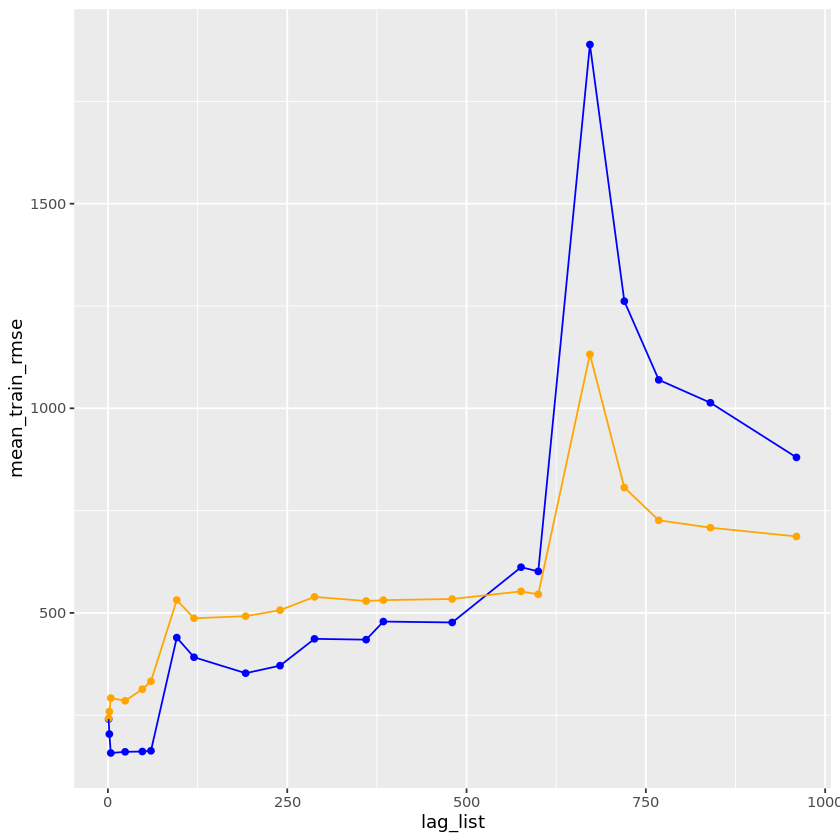

In [540]:
ggplot() + 
    geom_point(aes(x=lag_list, y=mean_train_rmse), col="blue") + 
    geom_point(aes(x=lag_list, y=mean_val_rmse), col="orange") +
    geom_line(aes(x=lag_list, y=mean_train_rmse), col="blue") + 
    geom_line(aes(x=lag_list, y=mean_val_rmse), col="orange") 

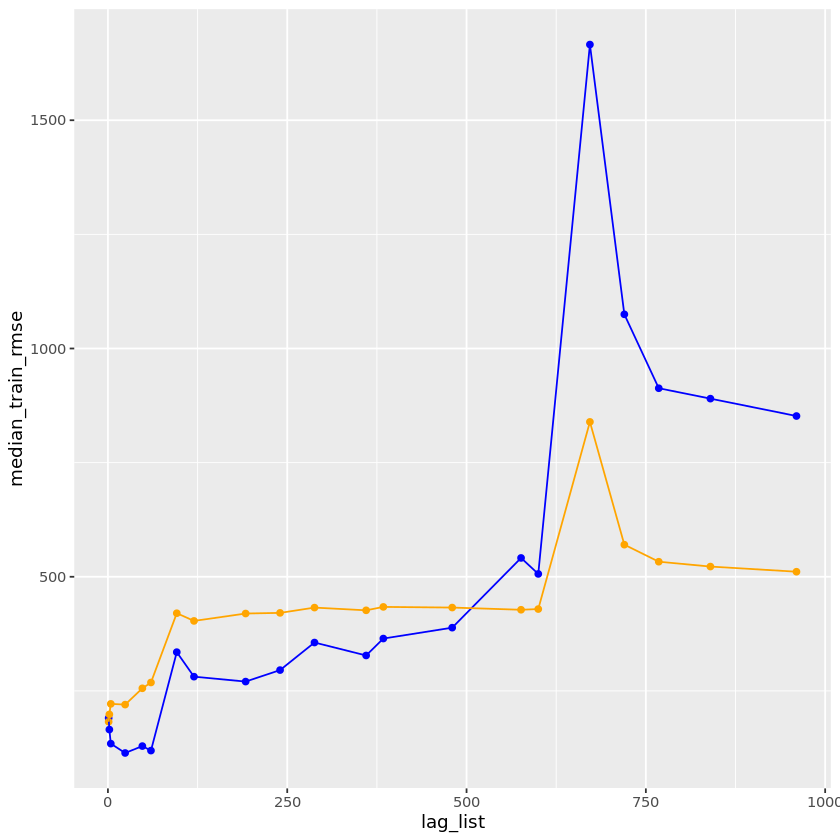

In [541]:
ggplot() + 
    geom_point(aes(x=lag_list, y=median_train_rmse), col="blue") + 
    geom_point(aes(x=lag_list, y=median_val_rmse), col="orange") +
    geom_line(aes(x=lag_list, y=median_train_rmse), col="blue") + 
    geom_line(aes(x=lag_list, y=median_val_rmse), col="orange")

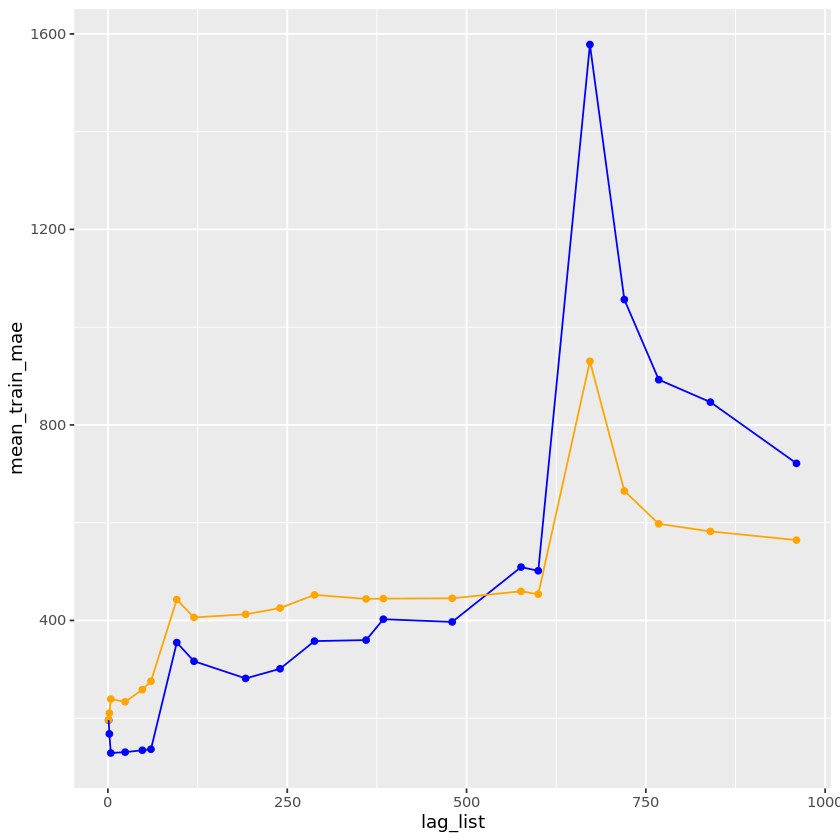

In [542]:
ggplot() + 
    geom_point(aes(x=lag_list, y=mean_train_mae), col="blue") + 
    geom_point(aes(x=lag_list, y=mean_val_mae), col="orange") +
    geom_line(aes(x=lag_list, y=mean_train_mae), col="blue") + 
    geom_line(aes(x=lag_list, y=mean_val_mae), col="orange") 

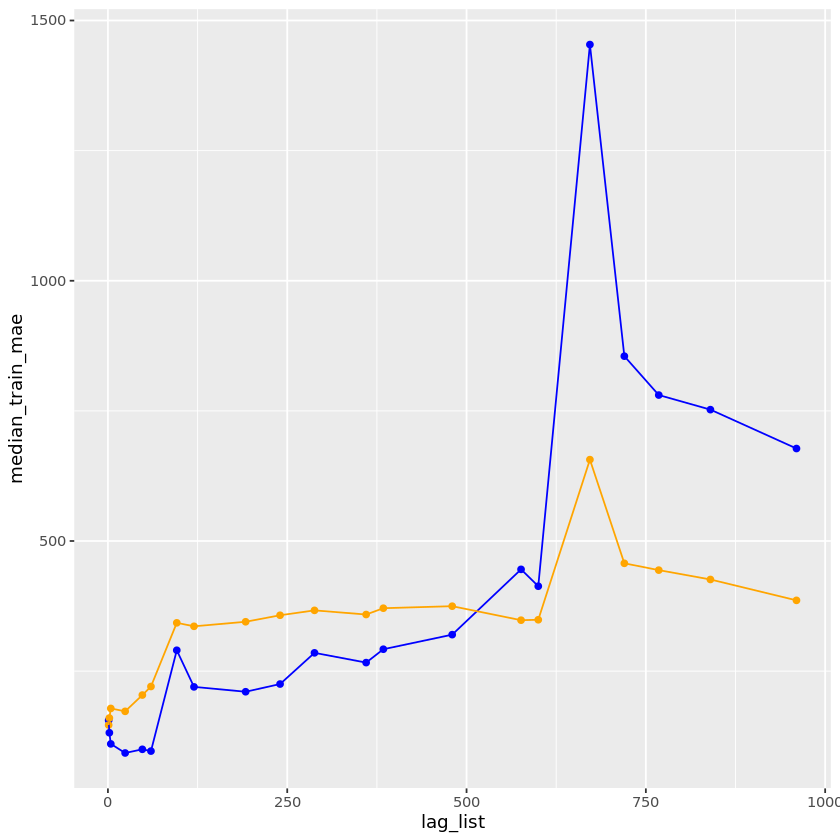

In [543]:
ggplot() + 
    geom_point(aes(x=lag_list, y=median_train_mae), col="blue") + 
    geom_point(aes(x=lag_list, y=median_val_mae), col="orange") +
    geom_line(aes(x=lag_list, y=median_train_mae), col="blue") + 
    geom_line(aes(x=lag_list, y=median_val_mae), col="orange")

In [564]:
global_lag_perf_df <- data.frame(lag=lag_list, 
                                 mean_train_rmse=mean_train_rmse, median_train_rmse=median_train_rmse,
                                 mean_train_mae=mean_train_mae, median_train_mae=median_train_mae,
                                 mean_val_rmse=mean_val_rmse, median_val_rmse=median_val_rmse,
                                 mean_val_mae=mean_val_mae, median_val_mae=median_val_mae
                                )

In [565]:
write.csv(global_lag_perf_df, 
          "Results/Pooled Regression Full Difference/lag_performance_single_diff.csv", row.names=FALSE)

96 seems to be the best lag to use, but the model does not generalize at all to the validation data

# Old

In [41]:
lag_list <- c(1,2,4,24,48,60,96,120,192,240,288,360,384,480,576,600,672,720,768,840,960)

In [42]:
mean_train_rmse <- c()
median_train_rmse <- c()
mean_train_mae <- c()
median_train_mae <- c()

mean_val_rmse <- c()
median_val_rmse <- c()
mean_val_mae <- c()
median_val_mae <- c()

for (lag in lag_list) {
    
    embed_mat_list <- lapply(total_df_list_samples,
                     function(x) lag_embed(x, lag=lag))
    embed_train_list <- lapply(embed_mat_list,
                               function(x) data.frame(x$train))
    embed_val_list <- lapply(embed_mat_list,
                             function(x) data.frame(x$val))    
                             
    global_ar_mod <- global_ar_least_squares(embed_train_list, embed_val_list, FALSE, FALSE)
                             
    train_rmse_mean <- mean(global_ar_mod$train_rmse)
    train_rmse_median <- median(global_ar_mod$train_rmse) 
    train_mae_mean <- mean(global_ar_mod$train_mae)
    train_mae_median <- median(global_ar_mod$train_mae)   
                             
    val_rmse_mean <- mean(global_ar_mod$val_rmse)
    val_rmse_median <- median(global_ar_mod$val_rmse)                                 
    val_mae_mean <- mean(global_ar_mod$val_mae)
    val_mae_median <- median(global_ar_mod$val_mae)  
                             
    mean_train_rmse <- c(mean_train_rmse, train_rmse_mean)      
    median_train_rmse <- c(median_train_rmse, train_rmse_median)                        
    mean_train_mae <- c(mean_train_mae, train_mae_mean)      
    median_train_mae <- c(median_train_mae, train_mae_median)                        
                             
    mean_val_rmse <- c(mean_val_rmse, val_rmse_mean)                         
    median_val_rmse <- c(median_val_rmse, val_rmse_median)                               
    mean_val_mae <- c(mean_val_mae, val_mae_mean)                         
    median_val_mae <- c(median_val_mae, val_mae_median)
                             
    print(lag)
    flush.console()                          
}

[1] 1
[1] 2
[1] 4
[1] 24
[1] 48
[1] 60
[1] 96
[1] 120
[1] 192
[1] 240
[1] 288
[1] 360
[1] 384
[1] 480
[1] 576
[1] 600
[1] 672
[1] 720
[1] 768
[1] 840
[1] 960


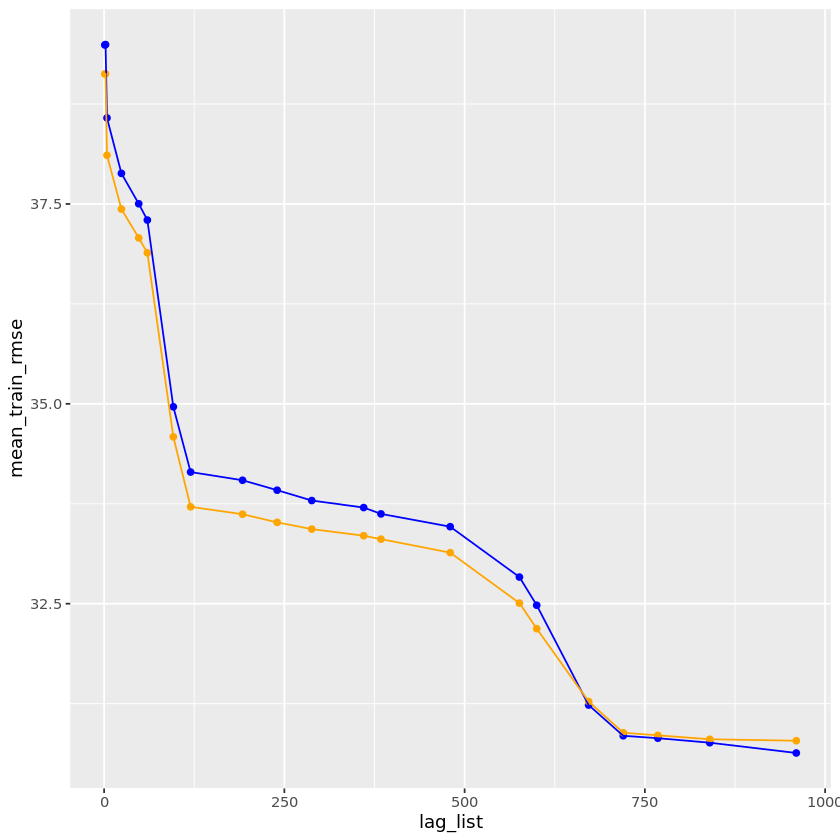

In [43]:
ggplot() + 
    geom_point(aes(x=lag_list, y=mean_train_rmse), col="blue") + 
    geom_point(aes(x=lag_list, y=mean_val_rmse), col="orange") +
    geom_line(aes(x=lag_list, y=mean_train_rmse), col="blue") + 
    geom_line(aes(x=lag_list, y=mean_val_rmse), col="orange") 

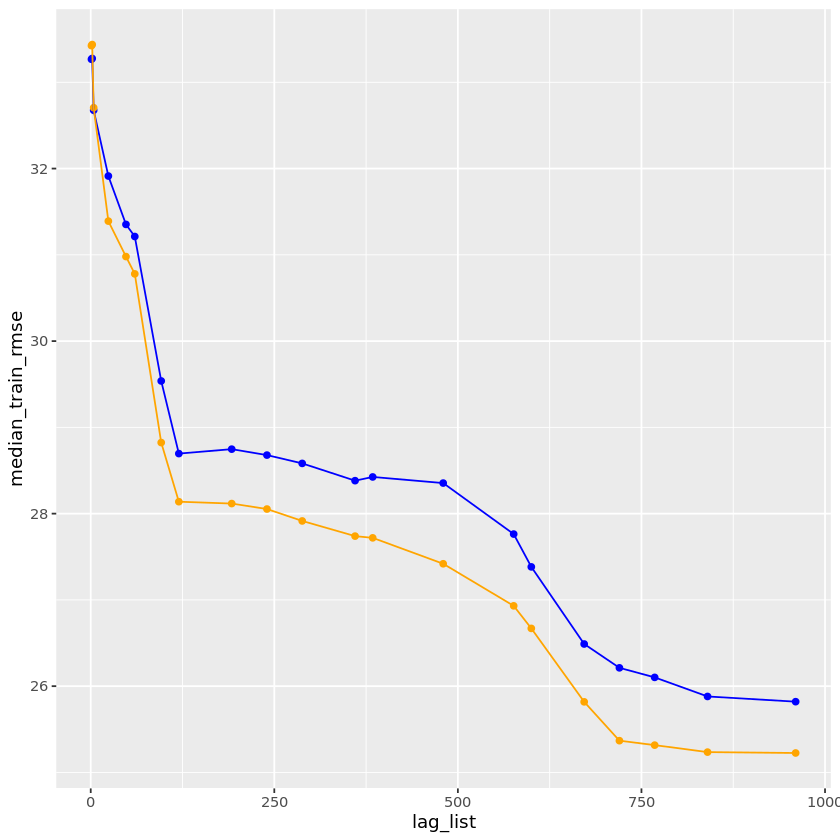

In [44]:
ggplot() + 
    geom_point(aes(x=lag_list, y=median_train_rmse), col="blue") + 
    geom_point(aes(x=lag_list, y=median_val_rmse), col="orange") +
    geom_line(aes(x=lag_list, y=median_train_rmse), col="blue") + 
    geom_line(aes(x=lag_list, y=median_val_rmse), col="orange")

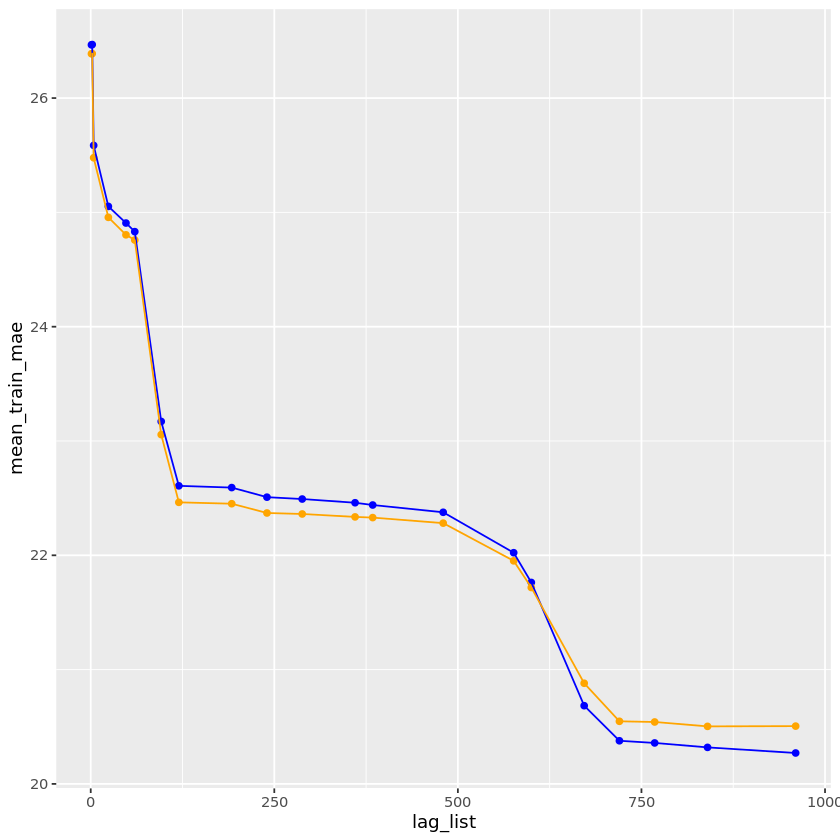

In [45]:
ggplot() + 
    geom_point(aes(x=lag_list, y=mean_train_mae), col="blue") + 
    geom_point(aes(x=lag_list, y=mean_val_mae), col="orange") +
    geom_line(aes(x=lag_list, y=mean_train_mae), col="blue") + 
    geom_line(aes(x=lag_list, y=mean_val_mae), col="orange") 

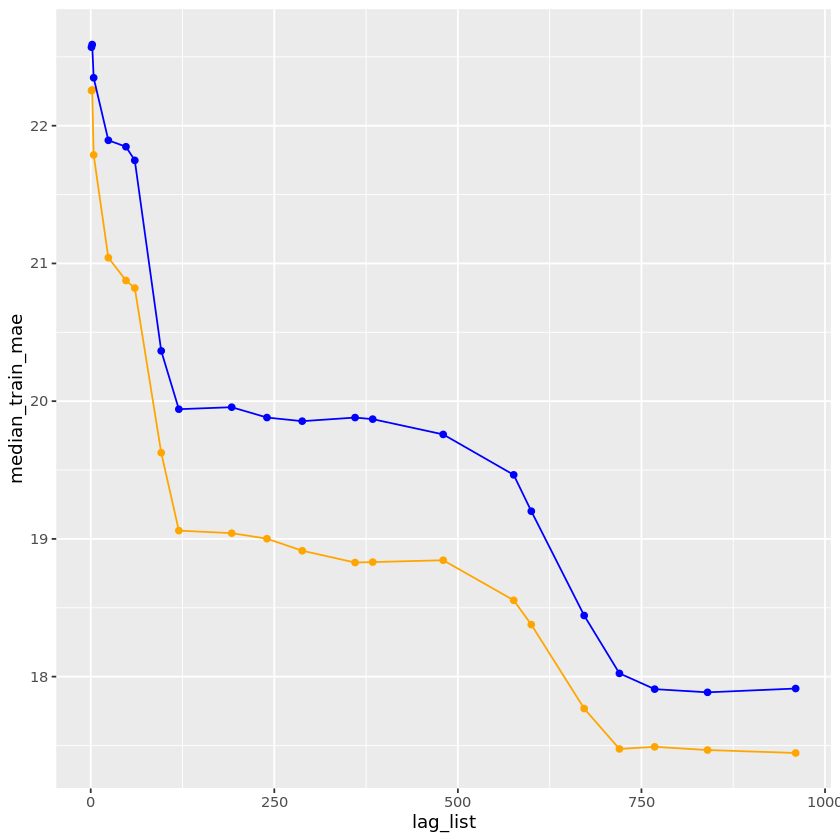

In [46]:
ggplot() + 
    geom_point(aes(x=lag_list, y=median_train_mae), col="blue") + 
    geom_point(aes(x=lag_list, y=median_val_mae), col="orange") +
    geom_line(aes(x=lag_list, y=median_train_mae), col="blue") + 
    geom_line(aes(x=lag_list, y=median_val_mae), col="orange")

In [50]:
global_lag_perf_df <- data.frame(lag=lag_list, 
                                 mean_train_rmse=mean_train_rmse, median_train_rmse=median_train_rmse,
                                 mean_train_mae=mean_train_mae, median_train_mae=median_train_mae,
                                 mean_val_rmse=mean_val_rmse, median_val_rmse=median_val_rmse,
                                 mean_val_mae=mean_val_mae, median_val_mae=median_val_mae
                                )

In [51]:
write.csv(global_lag_perf_df, "Results/Pooled Regression Full/lag_performance.csv", row.names=FALSE)

## Final Global AR Model - Full Data

In [31]:
embed_mat_list <- lapply(total_df_list_samples,
                     function(x) lag_embed(x, lag=840))
embed_train_list <- lapply(embed_mat_list,
                           function(x) data.frame(x$train))
embed_val_list <- lapply(embed_mat_list,
                         function(x) data.frame(x$val))   
embed_test_list <- lapply(embed_mat_list,
                          function(x) data.frame(x$test))                             

In [77]:
global_ar_final <- global_ar_least_squares(embed_train_list, embed_val_list)

In [68]:
saveRDS(global_ar_final, "Results/Pooled Regression Full/global_ar_model.RData")

In [80]:
mean(global_ar_final$train_rmse)

[1] 30.76145

In [81]:
mean(global_ar_final$train_mae)

[1] 20.31943

In [82]:
mean(global_ar_final$val_rmse)

[1] 30.80469

In [83]:
mean(global_ar_final$val_mae)

[1] 20.50319

## Global AR Model Test Predictions - Full Data

In [79]:
global_ar_final_test_preds <- global_ar_least_squares_pred(global_ar_final$model, embed_test_list)

In [84]:
mean(global_ar_final_test_preds$test_rmse)

[1] 31.61228

In [85]:
mean(global_ar_final_test_preds$test_mae)

[1] 20.92128

In [87]:
saveRDS(global_ar_final_test_preds, "Results/Pooled Regression Full/global_ar_model_test_pred.RData")

# Global AR Model - Random Clustering

In [88]:
random_clust <- read_csv('Results/Clustering/Random/random_clustering_assign.csv')

Rows: 76 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): ts_index, random_clust_assign


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [90]:
head(random_clust)

ts_index,random_clust_assign
<dbl>,<dbl>
1,4
2,4
3,4
4,4
5,3
6,4


In [98]:
embed_train_list_rand_clust_1 <- embed_train_list[c((random_clust %>% filter(random_clust_assign == 1))$ts_index)]
embed_train_list_rand_clust_2 <- embed_train_list[c((random_clust %>% filter(random_clust_assign == 2))$ts_index)]
embed_train_list_rand_clust_3 <- embed_train_list[c((random_clust %>% filter(random_clust_assign == 3))$ts_index)]
embed_train_list_rand_clust_4 <- embed_train_list[c((random_clust %>% filter(random_clust_assign == 4))$ts_index)]


In [99]:
embed_val_list_rand_clust_1 <- embed_val_list[c((random_clust %>% filter(random_clust_assign == 1))$ts_index)]
embed_val_list_rand_clust_2 <- embed_val_list[c((random_clust %>% filter(random_clust_assign == 2))$ts_index)]
embed_val_list_rand_clust_3 <- embed_val_list[c((random_clust %>% filter(random_clust_assign == 3))$ts_index)]
embed_val_list_rand_clust_4 <- embed_val_list[c((random_clust %>% filter(random_clust_assign == 4))$ts_index)]


In [100]:
embed_test_list_rand_clust_1 <- embed_test_list[c((random_clust %>% filter(random_clust_assign == 1))$ts_index)]
embed_test_list_rand_clust_2 <- embed_test_list[c((random_clust %>% filter(random_clust_assign == 2))$ts_index)]
embed_test_list_rand_clust_3 <- embed_test_list[c((random_clust %>% filter(random_clust_assign == 3))$ts_index)]
embed_test_list_rand_clust_4 <- embed_test_list[c((random_clust %>% filter(random_clust_assign == 4))$ts_index)]


In [102]:
global_ar_rand_clust_1 <- global_ar_least_squares(embed_train_list_rand_clust_1, embed_val_list_rand_clust_1)
global_ar_rand_clust_2 <- global_ar_least_squares(embed_train_list_rand_clust_2, embed_val_list_rand_clust_2)
global_ar_rand_clust_3 <- global_ar_least_squares(embed_train_list_rand_clust_3, embed_val_list_rand_clust_3)
global_ar_rand_clust_4 <- global_ar_least_squares(embed_train_list_rand_clust_4, embed_val_list_rand_clust_4)

In [103]:
saveRDS(global_ar_rand_clust_1, 
        "Results/Pooled Regression Clustering/Random Clustering/global_ar_model_cluster_1.RData")

saveRDS(global_ar_rand_clust_2, 
        "Results/Pooled Regression Clustering/Random Clustering/global_ar_model_cluster_2.RData")

saveRDS(global_ar_rand_clust_3, 
        "Results/Pooled Regression Clustering/Random Clustering/global_ar_model_cluster_3.RData")

saveRDS(global_ar_rand_clust_4, 
        "Results/Pooled Regression Clustering/Random Clustering/global_ar_model_cluster_4.RData")

In [154]:
mean(global_ar_rand_clust_1$train_rmse)

[1] 22.08005

In [155]:
mean(global_ar_rand_clust_2$train_rmse)

[1] 28.70896

In [156]:
mean(global_ar_rand_clust_3$train_rmse)

[1] 32.06991

In [157]:
mean(global_ar_rand_clust_4$train_rmse)

[1] 39.45434

In [158]:
mean(global_ar_rand_clust_1$val_rmse)

[1] 22.71413

In [159]:
mean(global_ar_rand_clust_2$val_rmse)

[1] 30.59514

In [160]:
mean(global_ar_rand_clust_3$val_rmse)

[1] 31.24323

In [161]:
mean(global_ar_rand_clust_4$val_rmse)

[1] 39.11617

## Test Preds

In [104]:
global_ar_rand_clust_1_preds <- global_ar_least_squares_pred(global_ar_rand_clust_1$model, 
                                                             embed_test_list_rand_clust_1)

global_ar_rand_clust_2_preds <- global_ar_least_squares_pred(global_ar_rand_clust_2$model, 
                                                             embed_test_list_rand_clust_2)

global_ar_rand_clust_3_preds <- global_ar_least_squares_pred(global_ar_rand_clust_3$model, 
                                                             embed_test_list_rand_clust_3)

global_ar_rand_clust_4_preds <- global_ar_least_squares_pred(global_ar_rand_clust_4$model, 
                                                             embed_test_list_rand_clust_4)

In [105]:
mean(global_ar_rand_clust_1_preds$test_rmse)

[1] 22.78795

In [106]:
mean(global_ar_rand_clust_2_preds$test_rmse)

[1] 29.95613

In [107]:
mean(global_ar_rand_clust_3_preds$test_rmse)

[1] 33.02688

In [108]:
mean(global_ar_rand_clust_4_preds$test_rmse)

[1] 41.58205

In [110]:
mean(c(global_ar_rand_clust_1_preds$test_rmse,
       global_ar_rand_clust_2_preds$test_rmse,
       global_ar_rand_clust_3_preds$test_rmse,
       global_ar_rand_clust_4_preds$test_rmse
      ))

[1] 31.83825

In [111]:
mean(global_ar_rand_clust_1_preds$test_mae)

[1] 15.39477

In [112]:
mean(global_ar_rand_clust_2_preds$test_mae)

[1] 20.28148

In [113]:
mean(global_ar_rand_clust_3_preds$test_mae)

[1] 22.07571

In [114]:
mean(global_ar_rand_clust_4_preds$test_mae)

[1] 27.08559

In [115]:
mean(c(global_ar_rand_clust_1_preds$test_mae,
       global_ar_rand_clust_2_preds$test_mae,
       global_ar_rand_clust_3_preds$test_mae,
       global_ar_rand_clust_4_preds$test_mae
      ))

[1] 21.20939

In [117]:
saveRDS(global_ar_rand_clust_1_preds, 
        "Results/Pooled Regression Clustering/Random Clustering/global_ar_model_cluster_1_test_pred.RData")

saveRDS(global_ar_rand_clust_2_preds, 
        "Results/Pooled Regression Clustering/Random Clustering/global_ar_model_cluster_2_test_pred.RData")

saveRDS(global_ar_rand_clust_3_preds, 
        "Results/Pooled Regression Clustering/Random Clustering/global_ar_model_cluster_3_test_pred.RData")

saveRDS(global_ar_rand_clust_4_preds, 
        "Results/Pooled Regression Clustering/Random Clustering/global_ar_model_cluster_4_test_pred.RData")

# Global AR Model - KMeans Catch22 Clustering

In [147]:
kmeans_catch22_clust <- read_csv('Results/Clustering/KMeans/kmeans_catch22_clustering_assign.csv')

Rows: 76 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): ts_index, kmeans_catch22_clust_assign


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [148]:
head(kmeans_catch22_clust)

ts_index,kmeans_catch22_clust_assign
<dbl>,<dbl>
1,1
2,1
3,1
4,1
5,1
6,1


In [149]:
max(kmeans_catch22_clust$kmeans_catch22_clust_assign)

[1] 2

In [150]:
embed_train_list_kmeans_catch22_clust_1 <- embed_train_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 1))$ts_index)]
embed_train_list_kmeans_catch22_clust_2 <- embed_train_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 2))$ts_index)]

In [151]:
embed_val_list_kmeans_catch22_clust_1 <- embed_val_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 1))$ts_index)]
embed_val_list_kmeans_catch22_clust_2 <- embed_val_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 2))$ts_index)]

In [152]:
embed_test_list_kmeans_catch22_clust_1 <- embed_test_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 1))$ts_index)]
embed_test_list_kmeans_catch22_clust_2 <- embed_test_list[c((kmeans_catch22_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 2))$ts_index)]

In [153]:
global_ar_kmeans_catch22_clust_1 <- global_ar_least_squares(embed_train_list_kmeans_catch22_clust_1, 
                                                            embed_val_list_kmeans_catch22_clust_1)
global_ar_kmeans_catch22_clust_2 <- global_ar_least_squares(embed_train_list_kmeans_catch22_clust_2, 
                                                            embed_val_list_kmeans_catch22_clust_2)

In [172]:
saveRDS(global_ar_kmeans_catch22_clust_1, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_model_kmeans_catch22_clust_1.RData")

saveRDS(global_ar_kmeans_catch22_clust_2, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_model_kmeans_catch22_clust_2.RData")

## Test Preds

In [163]:
global_ar_kmeans_catch22_clust_1_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_catch22_clust_1$model, 
                                                                           embed_test_list_kmeans_catch22_clust_1)

global_ar_kmeans_catch22_clust_2_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_catch22_clust_2$model, 
                                                                           embed_test_list_kmeans_catch22_clust_2)

In [164]:
mean(global_ar_kmeans_catch22_clust_1_test_pred$test_rmse)

[1] 32.17982

In [165]:
mean(global_ar_kmeans_catch22_clust_2_test_pred$test_rmse)

[1] 30.48896

In [166]:
mean(c(global_ar_kmeans_catch22_clust_1_test_pred$test_rmse,
       global_ar_kmeans_catch22_clust_2_test_pred$test_rmse
      ))

[1] 31.69036

In [167]:
mean(global_ar_kmeans_catch22_clust_1_test_pred$test_mae)

[1] 21.44171

In [168]:
mean(global_ar_kmeans_catch22_clust_2_test_pred$test_mae)

[1] 20.0722

In [169]:
mean(c(global_ar_kmeans_catch22_clust_1_test_pred$test_mae,
       global_ar_kmeans_catch22_clust_2_test_pred$test_mae
      ))

[1] 21.04528

In [171]:
saveRDS(global_ar_kmeans_catch22_clust_1_test_pred, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_kmeans_catch22_clust_1_test_pred.RData")

saveRDS(global_ar_kmeans_catch22_clust_2_test_pred, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_kmeans_catch22_clust_2_test_pred.RData")

# Global AR Model - KMeans Catch22 Clustering w Mean and Variance

In [180]:
kmeans_catch22_mv_clust <- read_csv('Results/Clustering/KMeans/kmeans_catch22_mean_var_clustering_assign.csv')

Rows: 76 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): ts_index, kmeans_catch22_clust_assign


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [181]:
max(kmeans_catch22_mv_clust$kmeans_catch22_clust_assign)

[1] 5

In [182]:
embed_train_list_kmeans_catch22_mv_clust_1 <- embed_train_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 1))$ts_index)]
embed_train_list_kmeans_catch22_mv_clust_2 <- embed_train_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 2))$ts_index)]
embed_train_list_kmeans_catch22_mv_clust_3 <- embed_train_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 3))$ts_index)]
embed_train_list_kmeans_catch22_mv_clust_4 <- embed_train_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 4))$ts_index)]
embed_train_list_kmeans_catch22_mv_clust_5 <- embed_train_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 5))$ts_index)]

In [183]:
embed_val_list_kmeans_catch22_mv_clust_1 <- embed_val_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 1))$ts_index)]
embed_val_list_kmeans_catch22_mv_clust_2 <- embed_val_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 2))$ts_index)]
embed_val_list_kmeans_catch22_mv_clust_3 <- embed_val_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 3))$ts_index)]
embed_val_list_kmeans_catch22_mv_clust_4 <- embed_val_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 4))$ts_index)]
embed_val_list_kmeans_catch22_mv_clust_5 <- embed_val_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 5))$ts_index)]

In [184]:
embed_test_list_kmeans_catch22_mv_clust_1 <- embed_test_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 1))$ts_index)]
embed_test_list_kmeans_catch22_mv_clust_2 <- embed_test_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 2))$ts_index)]
embed_test_list_kmeans_catch22_mv_clust_3 <- embed_test_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 3))$ts_index)]
embed_test_list_kmeans_catch22_mv_clust_4 <- embed_test_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 4))$ts_index)]
embed_test_list_kmeans_catch22_mv_clust_5 <- embed_test_list[c((kmeans_catch22_mv_clust %>% 
                                                               filter(kmeans_catch22_clust_assign == 5))$ts_index)]

In [185]:
global_ar_kmeans_catch22_mv_clust_1 <- global_ar_least_squares(embed_train_list_kmeans_catch22_mv_clust_1,
                                                               embed_val_list_kmeans_catch22_mv_clust_1)

global_ar_kmeans_catch22_mv_clust_2 <- global_ar_least_squares(embed_train_list_kmeans_catch22_mv_clust_2, 
                                                               embed_val_list_kmeans_catch22_mv_clust_2)

global_ar_kmeans_catch22_mv_clust_3 <- global_ar_least_squares(embed_train_list_kmeans_catch22_mv_clust_3,
                                                               embed_val_list_kmeans_catch22_mv_clust_3)

global_ar_kmeans_catch22_mv_clust_4 <- global_ar_least_squares(embed_train_list_kmeans_catch22_mv_clust_4, 
                                                               embed_val_list_kmeans_catch22_mv_clust_4)

global_ar_kmeans_catch22_mv_clust_5 <- global_ar_least_squares(embed_train_list_kmeans_catch22_mv_clust_5,
                                                               embed_val_list_kmeans_catch22_mv_clust_5)

In [186]:
saveRDS(global_ar_kmeans_catch22_mv_clust_1, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_model_kmeans_catch22_mv_clust_1.RData")

saveRDS(global_ar_kmeans_catch22_mv_clust_2, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_model_kmeans_catch22_mv_clust_2.RData")

saveRDS(global_ar_kmeans_catch22_mv_clust_3, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_model_kmeans_catch22_mv_clust_3.RData")

saveRDS(global_ar_kmeans_catch22_mv_clust_4, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_model_kmeans_catch22_mv_clust_4.RData")

saveRDS(global_ar_kmeans_catch22_mv_clust_5, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_model_kmeans_catch22_mv_clust_5.RData")


## Test Preds

In [187]:
global_ar_kmeans_catch22_mv_clust_1_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_catch22_mv_clust_1$model,
                                                                              embed_test_list_kmeans_catch22_mv_clust_1)

global_ar_kmeans_catch22_mv_clust_2_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_catch22_mv_clust_2$model,
                                                                              embed_test_list_kmeans_catch22_mv_clust_2)

global_ar_kmeans_catch22_mv_clust_3_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_catch22_mv_clust_3$model,
                                                                              embed_test_list_kmeans_catch22_mv_clust_3)

global_ar_kmeans_catch22_mv_clust_4_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_catch22_mv_clust_4$model,
                                                                              embed_test_list_kmeans_catch22_mv_clust_4)

global_ar_kmeans_catch22_mv_clust_5_test_pred <- global_ar_least_squares_pred(global_ar_kmeans_catch22_mv_clust_5$model,
                                                                              embed_test_list_kmeans_catch22_mv_clust_5)


In [188]:
mean(global_ar_kmeans_catch22_mv_clust_1_test_pred$test_rmse)

[1] 42.76768

In [189]:
mean(global_ar_kmeans_catch22_mv_clust_2_test_pred$test_rmse)

[1] 78.96979

In [190]:
mean(global_ar_kmeans_catch22_mv_clust_3_test_pred$test_rmse)

[1] 21.92167

In [191]:
mean(global_ar_kmeans_catch22_mv_clust_4_test_pred$test_rmse)

[1] 20.98901

In [192]:
mean(global_ar_kmeans_catch22_mv_clust_5_test_pred$test_rmse)

[1] 21.74914

In [193]:
mean(c(global_ar_kmeans_catch22_mv_clust_1_test_pred$test_rmse,
  global_ar_kmeans_catch22_mv_clust_2_test_pred$test_rmse,
  global_ar_kmeans_catch22_mv_clust_3_test_pred$test_rmse,
  global_ar_kmeans_catch22_mv_clust_4_test_pred$test_rmse,
  global_ar_kmeans_catch22_mv_clust_5_test_pred$test_rmse))

[1] 31.54717

In [194]:
mean(global_ar_kmeans_catch22_mv_clust_1_test_pred$test_mae)

[1] 28.21824

In [195]:
mean(global_ar_kmeans_catch22_mv_clust_2_test_pred$test_mae)

[1] 50.47029

In [196]:
mean(global_ar_kmeans_catch22_mv_clust_3_test_pred$test_mae)

[1] 14.77393

In [197]:
mean(global_ar_kmeans_catch22_mv_clust_4_test_pred$test_mae)

[1] 14.48005

In [198]:
mean(global_ar_kmeans_catch22_mv_clust_5_test_pred$test_mae)

[1] 14.31248

In [199]:
mean(c(global_ar_kmeans_catch22_mv_clust_1_test_pred$test_mae,
  global_ar_kmeans_catch22_mv_clust_2_test_pred$test_mae,
  global_ar_kmeans_catch22_mv_clust_3_test_pred$test_mae,
  global_ar_kmeans_catch22_mv_clust_4_test_pred$test_mae,
  global_ar_kmeans_catch22_mv_clust_5_test_pred$test_mae))

[1] 21.03749

In [200]:
saveRDS(global_ar_kmeans_catch22_mv_clust_1_test_pred, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_kmeans_catch22_mv_clust_1_test_pred.RData")

saveRDS(global_ar_kmeans_catch22_mv_clust_2_test_pred, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_kmeans_catch22_mv_clust_2_test_pred.RData")

saveRDS(global_ar_kmeans_catch22_mv_clust_3_test_pred, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_kmeans_catch22_mv_clust_3_test_pred.RData")

saveRDS(global_ar_kmeans_catch22_mv_clust_4_test_pred, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_kmeans_catch22_mv_clust_4_test_pred.RData")

saveRDS(global_ar_kmeans_catch22_mv_clust_5_test_pred, 
        "Results/Pooled Regression Clustering/KMeans/global_ar_kmeans_catch22_mv_clust_5_test_pred.RData")


# Global AR Model - GMM Using Catch22

In [27]:
gmm_catch22_clust <- read_csv('Results/Clustering/GMM/gmm_catch22_clustering_assign.csv')

Rows: 76 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): ts_index, gmm_catch22_clust_assign, uncertainty


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [28]:
max(gmm_catch22_clust$gmm_catch22_clust_assign)

[1] 2

In [29]:
gmm_catch22_clust %>% group_by(gmm_catch22_clust_assign) %>% summarise(n())

gmm_catch22_clust_assign,n()
<dbl>,<int>
1,54
2,22


In [33]:
embed_train_list_gmm_catch22_clust_1 <- embed_train_list[c((gmm_catch22_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 1))$ts_index)]

embed_train_list_gmm_catch22_clust_2 <- embed_train_list[c((gmm_catch22_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 2))$ts_index)]


In [34]:
embed_val_list_gmm_catch22_clust_1 <- embed_val_list[c((gmm_catch22_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 1))$ts_index)]

embed_val_list_gmm_catch22_clust_2 <- embed_val_list[c((gmm_catch22_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 2))$ts_index)]

In [35]:
embed_test_list_gmm_catch22_clust_1 <- embed_test_list[c((gmm_catch22_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 1))$ts_index)]

embed_test_list_gmm_catch22_clust_2 <- embed_test_list[c((gmm_catch22_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 2))$ts_index)]

In [36]:
global_ar_gmm_catch22_clust_1 <- global_ar_least_squares(embed_train_list_gmm_catch22_clust_1,
                                                         embed_val_list_gmm_catch22_clust_1)

global_ar_gmm_catch22_clust_2 <- global_ar_least_squares(embed_train_list_gmm_catch22_clust_2,
                                                         embed_val_list_gmm_catch22_clust_2)

In [37]:
saveRDS(global_ar_gmm_catch22_clust_1, 
        "Results/Pooled Regression Clustering/GMM/global_ar_model_gmm_catch22_clust_1.RData")

saveRDS(global_ar_gmm_catch22_clust_2, 
        "Results/Pooled Regression Clustering/GMM/global_ar_model_gmm_catch22_clust_2.RData")


## Test Preds

In [38]:
global_ar_gmm_catch22_clust_1_test_pred <- global_ar_least_squares_pred(global_ar_gmm_catch22_clust_1$model,
                                                                        embed_test_list_gmm_catch22_clust_1)

global_ar_gmm_catch22_clust_2_test_pred <- global_ar_least_squares_pred(global_ar_gmm_catch22_clust_2$model,
                                                                        embed_test_list_gmm_catch22_clust_2)
                                                                        

In [39]:
mean(global_ar_gmm_catch22_clust_1_test_pred$test_rmse)

[1] 29.17146

In [40]:
mean(global_ar_gmm_catch22_clust_2_test_pred$test_rmse)

[1] 37.98074

In [41]:
mean(c(global_ar_gmm_catch22_clust_1_test_pred$test_rmse,
       global_ar_gmm_catch22_clust_2_test_pred$test_rmse))

[1] 31.72151

In [42]:
mean(global_ar_gmm_catch22_clust_1_test_pred$test_mae)

[1] 19.55924

In [43]:
mean(global_ar_gmm_catch22_clust_2_test_pred$test_mae)

[1] 24.72772

In [44]:
mean(c(global_ar_gmm_catch22_clust_1_test_pred$test_mae,
       global_ar_gmm_catch22_clust_2_test_pred$test_mae))

[1] 21.05538

In [45]:
saveRDS(global_ar_gmm_catch22_clust_1_test_pred, 
        "Results/Pooled Regression Clustering/GMM/global_ar_gmm_catch22_clust_1_test_pred.RData")

saveRDS(global_ar_gmm_catch22_clust_2_test_pred, 
        "Results/Pooled Regression Clustering/GMM/global_ar_gmm_catch22_clust_2_test_pred.RData")

# Global AR Model - GMM Using Catch22 w Mean and Variance

In [46]:
gmm_catch22_mv_clust <- read_csv("Results/Clustering/GMM/gmm_catch22_mean_var_clustering_assign.csv")

Rows: 76 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): ts_index, gmm_catch22_clust_assign, uncertainty


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [47]:
max(gmm_catch22_mv_clust$gmm_catch22_clust_assign)

[1] 2

In [48]:
gmm_catch22_mv_clust %>% group_by(gmm_catch22_clust_assign) %>% summarise(n())

gmm_catch22_clust_assign,n()
<dbl>,<int>
1,57
2,19


In [49]:
embed_train_list_gmm_catch22_mv_clust_1 <- embed_train_list[c((gmm_catch22_mv_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 1))$ts_index)]

embed_train_list_gmm_catch22_mv_clust_2 <- embed_train_list[c((gmm_catch22_mv_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 2))$ts_index)]


In [51]:
embed_val_list_gmm_catch22_mv_clust_1 <- embed_val_list[c((gmm_catch22_mv_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 1))$ts_index)]

embed_val_list_gmm_catch22_mv_clust_2 <- embed_val_list[c((gmm_catch22_mv_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 2))$ts_index)]

In [50]:
embed_test_list_gmm_catch22_mv_clust_1 <- embed_test_list[c((gmm_catch22_mv_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 1))$ts_index)]

embed_test_list_gmm_catch22_mv_clust_2 <- embed_test_list[c((gmm_catch22_mv_clust %>% 
                                                            filter(gmm_catch22_clust_assign == 2))$ts_index)]

In [52]:
global_ar_gmm_catch22_mv_clust_1 <- global_ar_least_squares(embed_train_list_gmm_catch22_mv_clust_1,
                                                            embed_val_list_gmm_catch22_mv_clust_1)

global_ar_gmm_catch22_mv_clust_2 <- global_ar_least_squares(embed_train_list_gmm_catch22_mv_clust_2,
                                                            embed_val_list_gmm_catch22_mv_clust_2)

In [53]:
saveRDS(global_ar_gmm_catch22_mv_clust_1, 
        "Results/Pooled Regression Clustering/GMM/global_ar_model_gmm_catch22_mv_clust_1.RData")

saveRDS(global_ar_gmm_catch22_mv_clust_2, 
        "Results/Pooled Regression Clustering/GMM/global_ar_model_gmm_catch22_mv_clust_2.RData")


## Test Preds

In [54]:
global_ar_gmm_catch22_mv_clust_1_test_pred <- global_ar_least_squares_pred(global_ar_gmm_catch22_mv_clust_1$model,
                                                                           embed_test_list_gmm_catch22_mv_clust_1)

global_ar_gmm_catch22_mv_clust_2_test_pred <- global_ar_least_squares_pred(global_ar_gmm_catch22_mv_clust_2$model,
                                                                           embed_test_list_gmm_catch22_mv_clust_2)

In [55]:
mean(global_ar_gmm_catch22_mv_clust_1_test_pred$test_rmse)

[1] 29.77561

In [56]:
mean(global_ar_gmm_catch22_mv_clust_2_test_pred$test_rmse)

[1] 37.4103

In [57]:
mean(c(global_ar_gmm_catch22_mv_clust_1_test_pred$test_rmse,
       global_ar_gmm_catch22_mv_clust_2_test_pred$test_rmse))

[1] 31.68428

In [58]:
mean(global_ar_gmm_catch22_mv_clust_1_test_pred$test_mae)

[1] 19.97753

In [59]:
mean(global_ar_gmm_catch22_mv_clust_2_test_pred$test_mae)

[1] 24.21864

In [60]:
mean(c(global_ar_gmm_catch22_mv_clust_1_test_pred$test_mae,
       global_ar_gmm_catch22_mv_clust_2_test_pred$test_mae))

[1] 21.03781

In [61]:
saveRDS(global_ar_gmm_catch22_mv_clust_1_test_pred, 
        "Results/Pooled Regression Clustering/GMM/global_ar_gmm_catch22_mv_clust_1_test_pred.RData")

saveRDS(global_ar_gmm_catch22_mv_clust_2_test_pred, 
        "Results/Pooled Regression Clustering/GMM/global_ar_gmm_catch22_mv_clust_2_test_pred.RData")

# Global AR Model - DTW

In [62]:
dtw_clust <- read_csv('Results/Clustering/DTW/dtw_clustering_assign.csv')

Rows: 76 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): ts_index, dtw_clust_assign


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [63]:
max(dtw_clust$dtw_clust_assign)

[1] 2

In [64]:
dtw_clust %>% group_by(dtw_clust_assign) %>% summarise(n())

dtw_clust_assign,n()
<dbl>,<int>
1,25
2,51


In [65]:
embed_train_list_dtw_clust_1 <- embed_train_list[c((dtw_clust %>% 
                                                    filter(dtw_clust_assign == 1))$ts_index)]

embed_train_list_dtw_clust_2 <- embed_train_list[c((dtw_clust %>% 
                                                    filter(dtw_clust_assign == 2))$ts_index)]

In [67]:
embed_val_list_dtw_clust_1 <- embed_val_list[c((dtw_clust %>% 
                                                    filter(dtw_clust_assign == 1))$ts_index)]

embed_val_list_dtw_clust_2 <- embed_val_list[c((dtw_clust %>% 
                                                 filter(dtw_clust_assign == 2))$ts_index)]

In [68]:
embed_test_list_dtw_clust_1 <- embed_test_list[c((dtw_clust %>% 
                                                    filter(dtw_clust_assign == 1))$ts_index)]

embed_test_list_dtw_clust_2 <- embed_test_list[c((dtw_clust %>% 
                                                    filter(dtw_clust_assign == 2))$ts_index)]

In [69]:
global_ar_dtw_clust_1 <- global_ar_least_squares(embed_train_list_dtw_clust_1,
                                                 embed_val_list_dtw_clust_1)

global_ar_dtw_clust_2 <- global_ar_least_squares(embed_train_list_dtw_clust_2,
                                                 embed_val_list_dtw_clust_2)

In [70]:
saveRDS(global_ar_dtw_clust_1, 
        "Results/Pooled Regression Clustering/DTW/global_ar_dtw_clust_1.RData")

saveRDS(global_ar_dtw_clust_2, 
        "Results/Pooled Regression Clustering/DTW/global_ar_dtw_clust_2.RData")

## Test Preds

In [71]:
global_ar_dtw_clust_1_test_pred <- global_ar_least_squares_pred(global_ar_dtw_clust_1$model,
                                                                embed_test_list_dtw_clust_1)

global_ar_dtw_clust_2_test_pred <- global_ar_least_squares_pred(global_ar_dtw_clust_2$model,
                                                                embed_test_list_dtw_clust_2)

In [72]:
mean(global_ar_dtw_clust_1_test_pred$test_rmse)

[1] 53.03127

In [73]:
mean(global_ar_dtw_clust_2_test_pred$test_rmse)

[1] 21.03062

In [74]:
mean(c(global_ar_dtw_clust_1_test_pred$test_rmse,
       global_ar_dtw_clust_2_test_pred$test_rmse))

[1] 31.55715

In [75]:
mean(global_ar_dtw_clust_1_test_pred$test_mae)

[1] 34.2432

In [76]:
mean(global_ar_dtw_clust_2_test_pred$test_mae)

[1] 14.36389

In [77]:
mean(c(global_ar_dtw_clust_1_test_pred$test_mae,
       global_ar_dtw_clust_2_test_pred$test_mae))

[1] 20.90314

In [78]:
saveRDS(global_ar_dtw_clust_1_test_pred, 
        "Results/Pooled Regression Clustering/DTW/global_ar_dtw_clust_1_test_pred.RData")

saveRDS(global_ar_dtw_clust_2_test_pred, 
        "Results/Pooled Regression Clustering/DTW/global_ar_dtw_clust_2_test_pred.RData")

# Global AR Model - DTW Norm

In [79]:
dtw_norm_clust <- read_csv('Results/Clustering/DTW/dtw_norm_clustering_assign.csv')

Rows: 76 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): ts_index, dtw_clust_assign


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [81]:
max(dtw_norm_clust$dtw_clust_assign)

[1] 2

In [82]:
dtw_norm_clust %>% group_by(dtw_clust_assign) %>% summarise(n())

dtw_clust_assign,n()
<dbl>,<int>
1,70
2,6


In [84]:
embed_train_list_dtw_norm_clust_1 <- embed_train_list[c((dtw_norm_clust %>%
                                                         filter(dtw_clust_assign == 1))$ts_index)]

embed_train_list_dtw_norm_clust_2 <- embed_train_list[c((dtw_norm_clust %>% 
                                                         filter(dtw_clust_assign == 2))$ts_index)]

In [85]:
embed_val_list_dtw_norm_clust_1 <- embed_val_list[c((dtw_norm_clust %>%
                                                         filter(dtw_clust_assign == 1))$ts_index)]

embed_val_list_dtw_norm_clust_2 <- embed_val_list[c((dtw_norm_clust %>% 
                                                         filter(dtw_clust_assign == 2))$ts_index)]

In [86]:
embed_test_list_dtw_norm_clust_1 <- embed_test_list[c((dtw_norm_clust %>%
                                                         filter(dtw_clust_assign == 1))$ts_index)]

embed_test_list_dtw_norm_clust_2 <- embed_test_list[c((dtw_norm_clust %>% 
                                                         filter(dtw_clust_assign == 2))$ts_index)]

In [87]:
global_ar_dtw_norm_clust_1 <- global_ar_least_squares(embed_train_list_dtw_norm_clust_1,
                                                      embed_val_list_dtw_norm_clust_1)

global_ar_dtw_norm_clust_2 <- global_ar_least_squares(embed_train_list_dtw_norm_clust_2,
                                                      embed_val_list_dtw_norm_clust_2)

In [88]:
saveRDS(global_ar_dtw_norm_clust_1, 
        "Results/Pooled Regression Clustering/DTW/global_ar_dtw_norm_clust_1.RData")

saveRDS(global_ar_dtw_norm_clust_2, 
        "Results/Pooled Regression Clustering/DTW/global_ar_dtw_norm_clust_2.RData")

## Test Preds

In [89]:
global_ar_dtw_norm_clust_1_test_pred <- global_ar_least_squares_pred(global_ar_dtw_norm_clust_1$model,
                                                                     embed_test_list_dtw_norm_clust_1)

global_ar_dtw_norm_clust_2_test_pred <- global_ar_least_squares_pred(global_ar_dtw_norm_clust_2$model,
                                                                     embed_test_list_dtw_norm_clust_2)

In [90]:
mean(global_ar_dtw_norm_clust_1_test_pred$test_rmse)

[1] 32.39762

In [91]:
mean(global_ar_dtw_norm_clust_2_test_pred$test_rmse)

[1] 22.5112

In [92]:
mean(c(global_ar_dtw_norm_clust_1_test_pred$test_rmse,
       global_ar_dtw_norm_clust_2_test_pred$test_rmse))

[1] 31.61711

In [93]:
mean(global_ar_dtw_norm_clust_1_test_pred$test_mae)

[1] 21.48929

In [94]:
mean(global_ar_dtw_norm_clust_2_test_pred$test_mae)

[1] 14.8845

In [95]:
mean(c(global_ar_dtw_norm_clust_1_test_pred$test_mae,
       global_ar_dtw_norm_clust_2_test_pred$test_mae))

[1] 20.96786

In [96]:
saveRDS(global_ar_dtw_norm_clust_1_test_pred, 
        "Results/Pooled Regression Clustering/DTW/global_ar_dtw_norm_clust_1_test_pred.RData")

saveRDS(global_ar_dtw_norm_clust_2_test_pred, 
        "Results/Pooled Regression Clustering/DTW/global_ar_dtw_norm_clust_2_test_pred.RData")

In [ ]:
global_ar_least_squares <- function(train,
                                    test=NULL,
                                    lag=2, 
                                    normalize=TRUE,
                                    # asinh=FALSE, 
                                    # lambda=NULL,
                                    diff_lag=NULL,
                                    return_model=TRUE,
                                    return_fitted_values=TRUE,
                                    return_residuals=TRUE,
                                    return_train_rmse=TRUE,
                                    return_test_preds=FALSE,
                                    return_test_rmse=FALSE
                                   ) 
{ 
    
    # TRANSFORM DATA    
                       
    if (normalize) {                                  
        norm <- normalize(train)
        train_norm <- norm$norm
        mu=norm$mu
        sd=norm$sd
        
        if (!is.null(test)) {                     
            test_norm <- normalize(test, mu, sd)$norm                 
            }
    }
                        
    else {
        train_norm <- train_vec
        if (!is.null(test)) {    
            test_norm <- test_vec  
            }
    }                    
    
                        
#     if (asinh) {
#         train <- do.call("rbind", lapply(train_norm, function(x) embed(x, lag+1)))
#         train <- asinh_trans(train, lambda)
                                         
#         if (!is.null(test)) {
#             test <- do.call("rbind", lapply(test_norm, function(x) embed(x, lag+1)))
#             test <- asinh_trans(test, lambda)      
#         }                                       
#     }
#     else {                    
#         train <- do.call("rbind", lapply(train_norm, function(x) embed(x, lag+1)))   
                                         
#         if (!is.null(test)) {                                
#             test <- do.call("rbind", lapply(test_norm, function(x) embed(x, lag+1)))
#         }                                        
#     }
    
    if (!is.null(diff)){
        train_diff <- 
    }                                        
                                    
    # Create vectors of dependent and independent variables
    Y_train <- train[,1]
    X_train <- train[,-1]
    
    if (!is.null(test)) {
        Y_test <- test[,1]
        X_test <- test[,-1]
    }                                        

                                        
    # LINEAR AR MODEL BY LEAST SQUARES                                    
                                        
    # Linear AR model
    ar_model <- RcppArmadillo::fastLm(X=X_train, y=Y_train)
    ar_fitted_values <- fitted(ar_model) 
    ar_residuals <- residuals(ar_model)                                   
    ar_train_rmse <- rmse(Y_train, ar_fitted_values)
                                       
    if (asinh) {
        ar_train_rmse <- rmse(inv_asinh_trans(Y_train, lambda), 
                              inv_asinh_trans(ar_fitted_values, lambda))
    }
                                            
    # Predict on Test Data
    if (!is.null(test)) {
        if (lag == 1) {
            ar_test_preds <- ar_model$coefficients %*% X_test
        }
        else {
            ar_test_preds <- predict(ar_model, newdata=X_test)
        }
                                           
        ar_test_rmse <- rmse(Y_test, ar_test_preds)
                                           
        if (asinh) {
            ar_test_rmse <- rmse(inv_asinh_trans(Y_test, lambda), 
                                 inv_asinh_trans(ar_test_preds, lambda))
            ar_test_preds <- inv_asinh_trans(ar_test_preds, lambda)
        }
    }                                        
    

    # CREATE LIST TO RETURN
                                        
    return_list <- list()                                   
                                       
    if (return_model) {
        return_list <- list(model=ar_model)
    }

    if (return_fitted_values) {                             
        return_list <- append(return_list, list(fitted=ar_fitted_values))
    }
    
    if (return_residuals) {                            
        return_list <- append(return_list, list(residuals=ar_residuals))
    }
    
    if (return_train_rmse) {                             
        return_list <- append(return_list, list(train_rmse=ar_train_rmse))
    }
                                       
    if (return_test_preds) {
        return_list <- append(return_list, list(test_preds=ar_test_preds))
    }
                                       
    if (return_test_rmse) {
        return_list <- append(return_list, list(test_rmse=ar_test_rmse))
    }

    return_list                                           
}

In [ ]:
# global_ar_least_squares <- function(data, 
#                                     lag=2, 
#                                     train_test_split=0.7, 
#                                     normalize=TRUE,
#                                     asinh=FALSE, 
#                                     lambda=NULL, 
#                                     return_data=FALSE,
#                                     return_model=TRUE,
#                                     return_fitted_values=TRUE,
#                                     return_residuals=TRUE,
#                                     return_train_rmse=TRUE,
#                                     return_test_preds=TRUE,
#                                     return_test_rmse=TRUE
#                                    ) 
# { 
    
#     # SPLIT AND TRANSFORM DATA
    
#     # For data argument, function expects a list of time series on which lapply 
#     # can be used to create lag embedded matrix for training
        
# #     lag_mat <- do.call("rbind", lapply(data, function(x) embed(x, lag+1)))
    
# #     if (asinh) {
# #         lag_mat <- asinh_trans(lag_mat, lambda) #(((lag_mat + 1)^lambda)-1)/lambda  #((lag_mat^lambda) - 1) / lambda
# #     }
    
#     n <- lapply(data, function(x) floor(train_test_split*length(x)))                                    
#     train_vec <- mapply(function(x, n) x[1:n], data, n, SIMPLIFY=FALSE)
#     test_vec <- mapply(function(x, n) x[(n+1):length(x)], data, n, SIMPLIFY=FALSE) 
                       
#     if (normalize) {                   
#     train_mu <- lapply(train_vec, function(x) mean(x))               
#     train_sd <- lapply(train_vec, function(x) sd(x))
                       
#     train_norm <- mapply(function(x, sd) x/sd, 
#                          mapply(function(x, mu) x-mu, train_vec, train_mu, SIMPLIFY=FALSE),
#                          train_sd, SIMPLIFY=FALSE)
#     test_norm <- mapply(function(x, sd) x/sd, 
#                         mapply(function(x, mu) x-mu, test_vec, train_mu, SIMPLIFY=FALSE),
#                                train_sd, SIMPLIFY=FALSE)                   
#     }
                        
#     else {
#         train_norm <- train_vec
#         test_norm <- test_vec  
#     }                    
    
                        
#     if (asinh) {
#         train <- do.call("rbind", lapply(train_norm, function(x) embed(x, lag+1)))                
#         test <- do.call("rbind", lapply(test_norm, function(x) embed(x, lag+1)))
#         train <- asinh_trans(train, lambda)
#         test <- asinh_trans(test, lambda)                                
#     }
#     else {                    
#         train <- do.call("rbind", lapply(train_norm, function(x) embed(x, lag+1)))                
#         test <- do.call("rbind", lapply(test_norm, function(x) embed(x, lag+1)))
#     }
                                    
#     # Create vectors of dependent and independent variables
#     Y_train <- train[,1]
#     X_train <- train[,-1]
                                       
#     Y_test <- test[,1]
#     X_test <- test[,-1]

                                        
#     # LINEAR AR MODEL BY LEAST SQUARES                                    
                                        
#     # Linear AR model
#     ar_model <- RcppArmadillo::fastLm(X=X_train, y=Y_train)
#     ar_fitted_values <- fitted(ar_model) 
#     ar_residuals <- residuals(ar_model)                                   
#     ar_train_rmse <- rmse(Y_train, ar_fitted_values)
                                       
#     if (asinh) {
#         ar_train_rmse <- rmse(inv_asinh_trans(Y_train, lambda), 
#                               inv_asinh_trans(ar_fitted_values, lambda))
#     }
                                                                               
#     # Predict on Test Data
#     if (lag == 1) {
#         ar_test_preds <- ar_model$coefficients %*% X_test
#     }
#     else {
#         ar_test_preds <- predict(ar_model, newdata=X_test)
#     }
                                       
#     ar_test_rmse <- rmse(Y_test, ar_test_preds)
                                       
#     if (asinh) {
#         ar_test_rmse <- rmse(inv_asinh_trans(Y_test, lambda), 
#                              inv_asinh_trans(ar_test_preds, lambda))
#     }
    
#     # CREATE LIST TO RETURN
                                        
#     return_list <- list()                                   
                                       
#     if (return_model) {
#         return_list <- list(model=ar_model)
#     }

#     if (return_fitted_values) {                             
#         return_list <- append(return_list, list(fitted=ar_fitted_values))
#     }
    
#     if (return_residuals) {                            
#         return_list <- append(return_list, list(residuals=ar_residuals))
#     }
    
#     if (return_train_rmse) {                             
#         return_list <- append(return_list, list(train_rmse=ar_train_rmse))
#     }
                                       
#     if (return_test_preds) {
#         return_list <- append(return_list, list(test_preds=ar_test_preds))
#     }
                                       
#     if (return_test_rmse) {
#         return_list <- append(return_list, list(test_rmse=ar_test_rmse))
#     }
                                       
#     if (return_data) {
#         return_list <- append(return_list, list(train=train, test=test))
#     }

#     return_list                                           
# }

## PoC with Global AR24

In [ ]:
ar_24 <- global_ar_least_squares(model_data$train,
                                 model_data$test,
                                 lag=24, 
                                 normalize=TRUE,
                                 asinh=FALSE, 
                                 lambda=NULL, 
                                 return_model=FALSE,
                                 return_fitted_values=FALSE,
                                 return_residuals=FALSE,
                                 return_train_rmse=TRUE,
                                 return_test_preds=FALSE,
                                 return_test_rmse=TRUE)

In [ ]:
ar_24$train_rmse

In [ ]:
ar_24$test_rmse

# AR Models

## Full Data

In [ ]:
gc()

In [ ]:
lag_test_values <- c(1,2,12,24,48,96,97,193,289,385,481,577,673,769,865,961,1057,1153,1249,1345)
                     #192,288,384,480,576,672,768,864,960,1056,1152,1248,1344) # 2016 - Very memory intensive

In [ ]:
full_ar_model_train_results <- c()
full_ar_model_test_results <- c()

for (lag in lag_test_values[1:length(lag_test_values-1)]) {
    print(lag)
    flush.console()
    ar_full <- global_ar_least_squares(model_data$train,
                                       model_data$test,
                                       lag=lag, 
                                       normalize=TRUE,
                                       asinh=FALSE, 
                                       lambda=NULL, 
                                       return_model=FALSE,
                                       return_fitted_values=FALSE,
                                       return_residuals=FALSE,
                                       return_train_rmse=TRUE,
                                       return_test_preds=FALSE,
                                       return_test_rmse=TRUE)
    full_ar_model_train_results <- c(full_ar_model_train_results, ar_full$train_rmse)
    full_ar_model_test_results <- c(full_ar_model_test_results, ar_full$test_rmse)
    gc()
}

In [ ]:
plot(lag_test_values, full_ar_model_train_results)

In [ ]:
plot(lag_test_values, full_ar_model_test_results)

In [ ]:
full_ar_test_perf <- ggplot() + 
    geom_point(aes(x=lag_test_values, y=full_ar_model_test_results)) +
    geom_line(aes(x=lag_test_values, y=full_ar_model_test_results)) +
    labs(y="Test RMSE", x="Number of Lags in Model") +
    ggtitle("Performance of Pooled AR Model on Full Data")

In [ ]:
full_ar_test_perf

In [ ]:
ggsave("Plots/Results/full_global_ar.png", full_ar_test_perf, width=10, height=5)

In [ ]:
gc()

In [ ]:
best_lag <- lag_test_values[which.min(full_ar_model_test_results)]

In [ ]:
best_lag

In [ ]:
ar_full_best <- global_ar_least_squares(model_data$train,
                                        model_data$test,
                                        lag=best_lag, 
                                        normalize=TRUE,
                                        asinh=FALSE, 
                                        lambda=NULL, 
                                        return_model=TRUE,
                                        return_fitted_values=TRUE,
                                        return_residuals=TRUE,
                                        return_train_rmse=TRUE,
                                        return_test_preds=TRUE,
                                        return_test_rmse=TRUE)

In [ ]:
gc()

In [ ]:
summary(ar_full_best)

### Residual Analysis

In [ ]:
mean(ar_full_best$residuals)

In [ ]:
sd(ar_full_best$residuals)

In [ ]:
ar_full_best_res_dens <- ggplot() + 
    geom_density(aes(x=ar_full_best$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on Full Data")

In [ ]:
ar_full_best_res_dens

In [ ]:
ggsave("Plots/Results/ar_full_673_res_dens.png", ar_full_best_res_dens, width=6, height=6)

In [ ]:
ar_full_best_res_v_fit <- ggplot() + 
    geom_point(aes(x=ar_full_best$fitted, y=ar_full_best$residuals), alpha=0.5) + 
    geom_smooth(aes(x=ar_full_best$fitted, y=ar_full_best$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on Full Data")

In [ ]:
ar_full_best_res_v_fit

In [ ]:
ggsave("Plots/Results/ar_full_673_res_v_fit.png", ar_full_best_res_v_fit, width=6, height=6)

In [ ]:
ar_full_best_res_acf <- acf(ar_full_best$residuals, lag=best_lag, plot=FALSE)
ar_full_best_res_acf_lo <- -1*1.96/(length(ar_full_best$residuals)^0.5)
ar_full_best_res_acf_hi <- 1.96/(length(ar_full_best$residuals)^0.5)

In [ ]:
ar_full_best_res_acf_plot <- ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=ar_full_best_res_acf$lag[-1], 
                     xend=ar_full_best_res_acf$lag[-1], 
                     y=ar_full_best_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = ar_full_best_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = ar_full_best_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on Full Data"))

In [ ]:
ar_full_best_res_acf_plot

In [ ]:
ggsave("Plots/Results/ar_full_673_res_acf_no_lag_0.png", ar_full_best_res_acf_plot, width=10, height=5)

## Per Highway System Data

### England

In [ ]:
england_model_data <- train_test_split(england_total_volume_vec, train_test_split=(672*37)/(96*365))

In [ ]:
england_model_673 <- global_ar_least_squares(england_model_data$train,
                                             england_model_data$test,
                                             lag=best_lag, 
                                             normalize=TRUE,
                                             asinh=FALSE, 
                                             lambda=NULL, 
                                             return_model=TRUE,
                                             return_fitted_values=TRUE,
                                             return_residuals=TRUE,
                                             return_train_rmse=TRUE,
                                             return_test_preds=FALSE,
                                             return_test_rmse=TRUE)

In [ ]:
england_model_673$train_rmse

In [ ]:
england_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(england_model_673$residuals)

In [ ]:
sd(england_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=england_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on Highways England Data")

In [ ]:
ggplot() + 
    geom_point(aes(x=england_model_673$fitted, y=england_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=england_model_673$fitted, y=england_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on Highways England Data")

In [ ]:
england_model_673_res_acf <- acf(england_model_673$residuals, lag=best_lag, plot=FALSE)
england_model_673_res_acf_lo <- -1*1.96/(length(england_model_673$residuals)^0.5)
england_model_673_res_acf_hi <- 1.96/(length(england_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=england_model_673_res_acf$lag[-1], 
                     xend=england_model_673_res_acf$lag[-1], 
                     y=england_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = england_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = england_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on Highways England Data"))

### Portland

In [ ]:
portland_model_data <- train_test_split(portland_total_volume_vec, train_test_split=(672*37)/(96*365))

In [ ]:
portland_model_673 <- global_ar_least_squares(portland_model_data$train,
                                              portland_model_data$test,
                                              lag=best_lag, 
                                              normalize=TRUE,
                                              asinh=FALSE, 
                                              lambda=NULL, 
                                              return_model=TRUE,
                                              return_fitted_values=TRUE,
                                              return_residuals=TRUE,
                                              return_train_rmse=TRUE,
                                              return_test_preds=FALSE,
                                              return_test_rmse=TRUE)

In [ ]:
portland_model_673$train_rmse

In [ ]:
portland_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(portland_model_673$residuals)

In [ ]:
sd(portland_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=portland_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on Portland Data")

In [ ]:
ggplot() + 
    geom_point(aes(x=portland_model_673$fitted, y=portland_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=portland_model_673$fitted, y=portland_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on Portland Data")

In [ ]:
portland_model_673_res_acf <- acf(portland_model_673$residuals, lag=best_lag, plot=FALSE)
portland_model_673_res_acf_lo <- -1*1.96/(length(portland_model_673$residuals)^0.5)
portland_model_673_res_acf_hi <- 1.96/(length(portland_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=portland_model_673_res_acf$lag[-1], 
                     xend=portland_model_673_res_acf$lag[-1], 
                     y=portland_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = portland_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = portland_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on Portland Data"))

### Utah

In [ ]:
utah_model_data <- train_test_split(utah_total_volume_vec, train_test_split=(672*37)/(96*365))

In [ ]:
utah_model_673 <- global_ar_least_squares(utah_model_data$train,
                                          utah_model_data$test,
                                          lag=best_lag, 
                                          normalize=TRUE,
                                          asinh=FALSE, 
                                          lambda=NULL, 
                                          return_model=TRUE,
                                          return_fitted_values=TRUE,
                                          return_residuals=TRUE,
                                          return_train_rmse=TRUE,
                                          return_test_preds=FALSE,
                                          return_test_rmse=TRUE)

In [ ]:
utah_model_673$train_rmse

In [ ]:
utah_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(utah_model_673$residuals)

In [ ]:
sd(utah_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=utah_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on Utah Data")

In [ ]:
ggplot() + 
    geom_point(aes(x=utah_model_673$fitted, y=utah_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=utah_model_673$fitted, y=utah_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on Utah Data")

In [ ]:
utah_model_673_res_acf <- acf(utah_model_673$residuals, lag=best_lag, plot=FALSE)
utah_model_673_res_acf_lo <- -1*1.96/(length(utah_model_673$residuals)^0.5)
utah_model_673_res_acf_hi <- 1.96/(length(utah_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=utah_model_673_res_acf$lag[-1], 
                     xend=utah_model_673_res_acf$lag[-1], 
                     y=utah_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = utah_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = utah_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on Utah Data"))

### Average Performance

In [ ]:
mean(england_model_673$test_rmse, portland_model_673$test_rmse, utah_model_673$test_rmse)

## Random Clusters

### Cluster 1

In [ ]:
clust1_model_data <- train_test_split(clust1_total_volume_vec, train_test_split=(672*37)/(96*365))

In [ ]:
clus1_model_673 <- global_ar_least_squares(clust1_model_data$train,
                                           clust1_model_data$test,
                                           lag=best_lag, 
                                           normalize=TRUE,
                                           asinh=FALSE, 
                                           lambda=NULL, 
                                           return_model=TRUE,
                                           return_fitted_values=TRUE,
                                           return_residuals=TRUE,
                                           return_train_rmse=TRUE,
                                           return_test_preds=FALSE,
                                           return_test_rmse=TRUE)

In [ ]:
clus1_model_673$train_rmse

In [ ]:
clus1_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(clus1_model_673$residuals)

In [ ]:
sd(clus1_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=clus1_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on Random Cluster 1")

In [ ]:
ggplot() + 
    geom_point(aes(x=clus1_model_673$fitted, y=clus1_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=clus1_model_673$fitted, y=clus1_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on Random Cluster 1")

In [ ]:
clus1_model_673_res_acf <- acf(clus1_model_673$residuals, lag=best_lag, plot=FALSE)
clus1_model_673_res_acf_lo <- -1*1.96/(length(clus1_model_673$residuals)^0.5)
clus1_model_673_res_acf_hi <- 1.96/(length(clus1_model_673$residuals)^0.5)

In [ ]:
for (i in 0:5) {
    n1 <- 24191*i + 1
    n2 <- 24191*i + 24191 
    res_acf <- acf(clus1_model_673$residuals[n1:n2], lag=best_lag, plot=FALSE)
    res_acf_lo <- -1*1.96/(length(clus1_model_673$residuals[n1:n2])^0.5)
    res_acf_hi <- 1.96/(length(clus1_model_673$residuals[n1:n2])^0.5)
                           
    p <- ggplot() + 
        geom_hline(aes(yintercept = 0)) +
        geom_segment(aes(x=res_acf$lag[-1], 
                         xend=res_acf$lag[-1], 
                         y=res_acf$acf[-1], 
                         yend=0)) +
        geom_hline(aes(yintercept = res_acf_lo), col="blue", linetype=2) +
        geom_hline(aes(yintercept = res_acf_hi), col="blue", linetype=2) +
        labs(y="ACF", x="Lag")   
    
    print(p)
}

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=clus1_model_673_res_acf$lag[-1], 
                     xend=clus1_model_673_res_acf$lag[-1], 
                     y=clus1_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = clus1_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = clus1_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on Random Cluster 1"))

### Cluster 2

In [ ]:
clust2_model_data <- train_test_split(clust2_total_volume_vec, train_test_split=(672*37)/(96*365))

In [ ]:
clust2_model_673 <- global_ar_least_squares(clust2_model_data$train,
                                            clust2_model_data$test,
                                            lag=best_lag, 
                                            normalize=TRUE,
                                            asinh=FALSE, 
                                            lambda=NULL, 
                                            return_model=TRUE,
                                            return_fitted_values=TRUE,
                                            return_residuals=TRUE,
                                            return_train_rmse=TRUE,
                                            return_test_preds=FALSE,
                                            return_test_rmse=TRUE)

In [ ]:
clust2_model_673$train_rmse

In [ ]:
clust2_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(clust2_model_673$residuals)

In [ ]:
sd(clust2_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=clust2_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on Random Cluster 2")

In [ ]:
ggplot() + 
    geom_point(aes(x=clust2_model_673$fitted, y=clust2_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=clust2_model_673$fitted, y=clust2_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on Random Cluster 2")

In [ ]:
clust2_model_673_res_acf <- acf(clust2_model_673$residuals, lag=best_lag, plot=FALSE)
clust2_model_673_res_acf_lo <- -1*1.96/(length(clust2_model_673$residuals)^0.5)
clust2_model_673_res_acf_hi <- 1.96/(length(clust2_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=clust2_model_673_res_acf$lag[-1], 
                     xend=clust2_model_673_res_acf$lag[-1], 
                     y=clust2_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = clust2_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = clust2_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on Random Cluster 2"))

### Cluster 3

In [ ]:
clust3_model_data <- train_test_split(clust3_total_volume_vec, train_test_split=(672*37)/(96*365))

In [ ]:
clust3_model_673 <- global_ar_least_squares(clust3_model_data$train,
                                            clust3_model_data$test,
                                            lag=best_lag, 
                                            normalize=TRUE,
                                            asinh=FALSE, 
                                            lambda=NULL, 
                                            return_model=TRUE,
                                            return_fitted_values=TRUE,
                                            return_residuals=TRUE,
                                            return_train_rmse=TRUE,
                                            return_test_preds=FALSE,
                                            return_test_rmse=TRUE)

In [ ]:
clust3_model_673$train_rmse

In [ ]:
clust3_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(clust3_model_673$residuals)

In [ ]:
sd(clust3_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=clust3_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on Random Cluster 3")

In [ ]:
ggplot() + 
    geom_point(aes(x=clust3_model_673$fitted, y=clust3_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=clust3_model_673$fitted, y=clust3_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on Random Cluster 3")

In [ ]:
clust3_model_673_res_acf <- acf(clust3_model_673$residuals, lag=best_lag, plot=FALSE)
clust3_model_673_res_acf_lo <- -1*1.96/(length(clust3_model_673$residuals)^0.5)
clust3_model_673_res_acf_hi <- 1.96/(length(clust3_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=clust3_model_673_res_acf$lag[-1], 
                     xend=clust3_model_673_res_acf$lag[-1], 
                     y=clust3_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = clust3_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = clust3_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on Random Cluster 3"))

### Average Performance

In [ ]:
mean(clus1_model_673$test_rmse, clust2_model_673$test_rmse, clust3_model_673$test_rmse)

## K-Means Clusters

### Cluster 1

In [ ]:
kmeans_clust1_model_data <- train_test_split(kmeans_clust1_total_volume_vec, 
                                             train_test_split=(672*37)/(96*365))

In [ ]:
kmeans_clust1_model_673 <- global_ar_least_squares(kmeans_clust1_model_data$train,
                                                   kmeans_clust1_model_data$test,
                                                   lag=best_lag, 
                                                   normalize=TRUE,
                                                   asinh=FALSE, 
                                                   lambda=NULL, 
                                                   return_model=TRUE,
                                                   return_fitted_values=TRUE,
                                                   return_residuals=TRUE,
                                                   return_train_rmse=TRUE,
                                                   return_test_preds=FALSE,
                                                   return_test_rmse=TRUE)

In [ ]:
kmeans_clust1_model_673$train_rmse

In [ ]:
kmeans_clust1_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(kmeans_clust1_model_673$residuals)

In [ ]:
sd(kmeans_clust1_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=kmeans_clust1_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on K-Means Cluster 1")

In [ ]:
ggplot() + 
    geom_point(aes(x=kmeans_clust1_model_673$fitted, y=kmeans_clust1_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=kmeans_clust1_model_673$fitted, y=kmeans_clust1_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on K-Means Cluster 1")

In [ ]:
kmeans_clust1_model_673_res_acf <- acf(kmeans_clust1_model_673$residuals, lag=best_lag, plot=FALSE)
kmeans_clust1_model_673_res_acf_lo <- -1*1.96/(length(kmeans_clust1_model_673$residuals)^0.5)
kmeans_clust1_model_673_res_acf_hi <- 1.96/(length(kmeans_clust1_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=kmeans_clust1_model_673_res_acf$lag[-1], 
                     xend=kmeans_clust1_model_673_res_acf$lag[-1], 
                     y=kmeans_clust1_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = kmeans_clust1_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = kmeans_clust1_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on K-Means Cluster 1"))

### Cluster 2

In [ ]:
kmeans_clust2_model_data <- train_test_split(kmeans_clust2_total_volume_vec, 
                                             train_test_split=(672*37)/(96*365))

In [ ]:
kmeans_clust2_model_673 <- global_ar_least_squares(kmeans_clust2_model_data$train,
                                                   kmeans_clust2_model_data$test,
                                                   lag=best_lag, 
                                                   normalize=TRUE,
                                                   asinh=FALSE, 
                                                   lambda=NULL, 
                                                   return_model=TRUE,
                                                   return_fitted_values=TRUE,
                                                   return_residuals=TRUE,
                                                   return_train_rmse=TRUE,
                                                   return_test_preds=FALSE,
                                                   return_test_rmse=TRUE)

In [ ]:
kmeans_clust2_model_673$train_rmse

In [ ]:
kmeans_clust2_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(kmeans_clust2_model_673$residuals)

In [ ]:
sd(kmeans_clust2_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=kmeans_clust2_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on K-Means Cluster 2")

In [ ]:
ggplot() + 
    geom_point(aes(x=kmeans_clust2_model_673$fitted, y=kmeans_clust2_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=kmeans_clust2_model_673$fitted, y=kmeans_clust2_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on K-Means Cluster 2")

In [ ]:
kmeans_clust2_model_673_res_acf <- acf(kmeans_clust2_model_673$residuals, lag=best_lag, plot=FALSE)
kmeans_clust2_model_673_res_acf_lo <- -1*1.96/(length(kmeans_clust2_model_673$residuals)^0.5)
kmeans_clust2_model_673_res_acf_hi <- 1.96/(length(kmeans_clust2_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=kmeans_clust2_model_673_res_acf$lag[-1], 
                     xend=kmeans_clust2_model_673_res_acf$lag[-1], 
                     y=kmeans_clust2_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = kmeans_clust2_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = kmeans_clust2_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on K-Means Cluster 2"))

### Cluster 3

In [ ]:
kmeans_clust3_model_data <- train_test_split(kmeans_clust3_total_volume_vec, 
                                             train_test_split=(672*37)/(96*365))

In [ ]:
kmeans_clust3_model_673 <- global_ar_least_squares(kmeans_clust3_model_data$train,
                                                   kmeans_clust3_model_data$test,
                                                   lag=best_lag, 
                                                   normalize=TRUE,
                                                   asinh=FALSE, 
                                                   lambda=NULL, 
                                                   return_model=TRUE,
                                                   return_fitted_values=TRUE,
                                                   return_residuals=TRUE,
                                                   return_train_rmse=TRUE,
                                                   return_test_preds=FALSE,
                                                   return_test_rmse=TRUE)

In [ ]:
kmeans_clust3_model_673$train_rmse

In [ ]:
kmeans_clust3_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(kmeans_clust3_model_673$residuals)

In [ ]:
sd(kmeans_clust3_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=kmeans_clust3_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on K-Means Cluster 3")

In [ ]:
ggplot() + 
    geom_point(aes(x=kmeans_clust3_model_673$fitted, y=kmeans_clust3_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=kmeans_clust3_model_673$fitted, y=kmeans_clust3_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on K-Means Cluster 3")

In [ ]:
kmeans_clust3_model_673_res_acf <- acf(kmeans_clust3_model_673$residuals, lag=best_lag, plot=FALSE)
kmeans_clust3_model_673_res_acf_lo <- -1*1.96/(length(kmeans_clust3_model_673$residuals)^0.5)
kmeans_clust3_model_673_res_acf_hi <- 1.96/(length(kmeans_clust3_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=kmeans_clust3_model_673_res_acf$lag[-1], 
                     xend=kmeans_clust3_model_673_res_acf$lag[-1], 
                     y=kmeans_clust3_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = kmeans_clust3_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = kmeans_clust3_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on K-Means Cluster 3"))

### Cluster 4

In [ ]:
kmeans_clust4_model_data <- train_test_split(kmeans_clust4_total_volume_vec, 
                                             train_test_split=(672*37)/(96*365))

In [ ]:
kmeans_clust4_model_673 <- global_ar_least_squares(kmeans_clust4_model_data$train,
                                                   kmeans_clust4_model_data$test,
                                                   lag=best_lag, 
                                                   normalize=TRUE,
                                                   asinh=FALSE, 
                                                   lambda=NULL, 
                                                   return_model=TRUE,
                                                   return_fitted_values=TRUE,
                                                   return_residuals=TRUE,
                                                   return_train_rmse=TRUE,
                                                   return_test_preds=FALSE,
                                                   return_test_rmse=TRUE)

In [ ]:
kmeans_clust4_model_673$train_rmse

In [ ]:
kmeans_clust4_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(kmeans_clust4_model_673$residuals)

In [ ]:
sd(kmeans_clust4_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=kmeans_clust4_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on K-Means Cluster 4")

In [ ]:
ggplot() + 
    geom_point(aes(x=kmeans_clust4_model_673$fitted, y=kmeans_clust4_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=kmeans_clust4_model_673$fitted, y=kmeans_clust4_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on K-Means Cluster 4")

In [ ]:
kmeans_clust4_model_673_res_acf <- acf(kmeans_clust4_model_673$residuals, lag=best_lag, plot=FALSE)
kmeans_clust4_model_673_res_acf_lo <- -1*1.96/(length(kmeans_clust4_model_673$residuals)^0.5)
kmeans_clust4_model_673_res_acf_hi <- 1.96/(length(kmeans_clust4_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=kmeans_clust4_model_673_res_acf$lag[-1], 
                     xend=kmeans_clust4_model_673_res_acf$lag[-1], 
                     y=kmeans_clust4_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = kmeans_clust4_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = kmeans_clust4_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on K-Means Cluster 4"))

### Average Performance

In [ ]:
weighted.mean(c(kmeans_clust1_model_673$test_rmse, 
                kmeans_clust2_model_673$test_rmse, 
                kmeans_clust3_model_673$test_rmse,
                kmeans_clust4_model_673$test_rmse),
              c(length(kmeans_clust1_model_data$train),
                length(kmeans_clust2_model_data$train),
                length(kmeans_clust3_model_data$train),
                length(kmeans_clust4_model_data$train))
             )

## GMM Clusters

### Cluster 1

In [ ]:
gmm_clust1_model_data <- train_test_split(gmm_clust1_total_volume_vec,
                                          train_test_split=(672*37)/(96*365))

In [ ]:
gmm_clust1_model_673 <- global_ar_least_squares(gmm_clust1_model_data$train,
                                                gmm_clust1_model_data$test,
                                                lag=best_lag, 
                                                normalize=TRUE,
                                                asinh=FALSE, 
                                                lambda=NULL, 
                                                return_model=TRUE,
                                                return_fitted_values=TRUE,
                                                return_residuals=TRUE,
                                                return_train_rmse=TRUE,
                                                return_test_preds=FALSE,
                                                return_test_rmse=TRUE)

In [ ]:
gmm_clust1_model_673$train_rmse

In [ ]:
gmm_clust1_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(gmm_clust1_model_673$residuals)

In [ ]:
sd(gmm_clust1_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=gmm_clust1_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on GMM Cluster 1")

In [ ]:
ggplot() + 
    geom_point(aes(x=gmm_clust1_model_673$fitted, y=gmm_clust1_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=gmm_clust1_model_673$fitted, y=gmm_clust1_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on GMM Cluster 1")

In [ ]:
gmm_clust1_model_673_res_acf <- acf(gmm_clust1_model_673$residuals, lag=best_lag, plot=FALSE)
gmm_clust1_model_673_res_acf_lo <- -1*1.96/(length(gmm_clust1_model_673$residuals)^0.5)
gmm_clust1_model_673_res_acf_hi <- 1.96/(length(gmm_clust1_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=gmm_clust1_model_673_res_acf$lag[-1], 
                     xend=gmm_clust1_model_673_res_acf$lag[-1], 
                     y=gmm_clust1_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = gmm_clust1_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = gmm_clust1_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on GMM Cluster 1"))

### Cluster 2

In [ ]:
gmm_clust2_model_data <- train_test_split(gmm_clust2_total_volume_vec,
                                          train_test_split=(672*37)/(96*365))

In [ ]:
gmm_clust2_model_673 <- global_ar_least_squares(gmm_clust2_model_data$train,
                                                gmm_clust2_model_data$test,
                                                lag=best_lag, 
                                                normalize=TRUE,
                                                asinh=FALSE, 
                                                lambda=NULL, 
                                                return_model=TRUE,
                                                return_fitted_values=TRUE,
                                                return_residuals=TRUE,
                                                return_train_rmse=TRUE,
                                                return_test_preds=FALSE,
                                                return_test_rmse=TRUE)

In [ ]:
gmm_clust2_model_673$train_rmse

In [ ]:
gmm_clust2_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(gmm_clust2_model_673$residuals)

In [ ]:
sd(gmm_clust2_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=gmm_clust2_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on GMM Cluster 2")

In [ ]:
ggplot() + 
    geom_point(aes(x=gmm_clust2_model_673$fitted, y=gmm_clust2_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=gmm_clust2_model_673$fitted, y=gmm_clust2_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on GMM Cluster 2")

In [ ]:
gmm_clust2_model_673_res_acf <- acf(gmm_clust2_model_673$residuals, lag=best_lag, plot=FALSE)
gmm_clust2_model_673_res_acf_lo <- -1*1.96/(length(gmm_clust2_model_673$residuals)^0.5)
gmm_clust2_model_673_res_acf_hi <- 1.96/(length(gmm_clust2_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=gmm_clust2_model_673_res_acf$lag[-1], 
                     xend=gmm_clust2_model_673_res_acf$lag[-1], 
                     y=gmm_clust2_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = gmm_clust2_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = gmm_clust2_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on GMM Cluster 2"))

### Cluster 3

In [ ]:
gmm_clust3_model_data <- train_test_split(gmm_clust3_total_volume_vec,
                                          train_test_split=(672*37)/(96*365))

In [ ]:
gmm_clust3_model_673 <- global_ar_least_squares(gmm_clust3_model_data$train,
                                                gmm_clust3_model_data$test,
                                                lag=best_lag, 
                                                normalize=TRUE,
                                                asinh=FALSE, 
                                                lambda=NULL, 
                                                return_model=TRUE,
                                                return_fitted_values=TRUE,
                                                return_residuals=TRUE,
                                                return_train_rmse=TRUE,
                                                return_test_preds=FALSE,
                                                return_test_rmse=TRUE)

In [ ]:
gmm_clust3_model_673$train_rmse

In [ ]:
gmm_clust3_model_673$test_rmse

#### Residual Analysis

In [ ]:
mean(gmm_clust3_model_673$residuals)

In [ ]:
sd(gmm_clust3_model_673$residuals)

In [ ]:
ggplot() + 
    geom_density(aes(x=gmm_clust3_model_673$residuals)) + 
    labs(x="Residual", y="Density") + 
    ggtitle("Residual Density for Pooled AR-673 Model on GMM Cluster 3")

In [ ]:
ggplot() + 
    geom_point(aes(x=gmm_clust3_model_673$fitted, y=gmm_clust3_model_673$residuals), alpha=0.5) + 
    geom_smooth(aes(x=gmm_clust3_model_673$fitted, y=gmm_clust3_model_673$residuals)) + 
    labs(x="Fitted Value", y="Residual") + 
    ggtitle("Fitted Values vs Residuals for Pooled AR-673 Model on GMM Cluster 3")

In [ ]:
gmm_clust3_model_673_res_acf <- acf(gmm_clust3_model_673$residuals, lag=best_lag, plot=FALSE)
gmm_clust3_model_673_res_acf_lo <- -1*1.96/(length(gmm_clust3_model_673$residuals)^0.5)
gmm_clust3_model_673_res_acf_hi <- 1.96/(length(gmm_clust3_model_673$residuals)^0.5)

In [ ]:
ggplot() + 
    geom_hline(aes(yintercept = 0)) +
    geom_segment(aes(x=gmm_clust3_model_673_res_acf$lag[-1], 
                     xend=gmm_clust3_model_673_res_acf$lag[-1], 
                     y=gmm_clust3_model_673_res_acf$acf[-1], 
                     yend=0)) +
    geom_hline(aes(yintercept = gmm_clust3_model_673_res_acf_lo), col="blue", linetype=2) +
    geom_hline(aes(yintercept = gmm_clust3_model_673_res_acf_hi), col="blue", linetype=2) +
    labs(y="ACF", x="Lag") + 
    ggtitle(str_glue("ACF of Model Residuals for Pooled AR-673 Model on GMM Cluster 3"))

### Cluster 4

In [ ]:
gmm_clust4_model_data <- train_test_split(gmm_clust4_total_volume_vec,
                                          train_test_split=(672*37)/(96*365))

In [ ]:
gmm_clust4_model_673 <- global_ar_least_squares(gmm_clust4_model_data$train,
                                                gmm_clust4_model_data$test,
                                                lag=best_lag, 
                                                normalize=TRUE,
                                                asinh=FALSE, 
                                                lambda=NULL, 
                                                return_model=TRUE,
                                                return_fitted_values=TRUE,
                                                return_residuals=TRUE,
                                                return_train_rmse=TRUE,
                                                return_test_preds=FALSE,
                                                return_test_rmse=TRUE)

In [ ]:
gmm_clust4_model_673$train_rmse

In [ ]:
gmm_clust4_model_673$test_rmse

#### Residual Analysis

### Average Performance

In [ ]:
weighted.mean(c(gmm_clust1_model_673$test_rmse, 
                gmm_clust2_model_673$test_rmse, 
                gmm_clust3_model_673$test_rmse,
                gmm_clust4_model_673$test_rmse),
              c(length(gmm_clust1_model_data$train),
                length(gmm_clust2_model_data$train),
                length(gmm_clust3_model_data$train),
                length(gmm_clust4_model_data$train))
             )

# Global AR Models on Singly Differenced Data

In [ ]:
difference <- function(data, lag=1){
    diff_data <- lapply(data, function(x) x[(1+lag):length(x)] - x[1:(length(x)-lag)])                  
}

In [ ]:
inv_difference <- function(data, lag=1, initial_data=NULL) {
    if (is.null(initial_data)) {
        undiff <- lapply(data, function(x) diffinv(x, lag=lag))
    }
                         
    else {
        undiff <- lapply(1:length(data), function(x) diffinv(data[[x]], lag=lag, xi=initial_data[[x]]))
    }                     
    undiff                     
}

## Full Data

In [ ]:
model_train_diff <- difference(difference(model_data$train, lag=96))
model_test_diff <- difference(model_data$test)

In [ ]:
ggplot() + 
    geom_line(aes(x=1:(96*14), y=model_data$train[[1]][1:(96*14)]))

In [ ]:
ggplot() + 
    geom_line(aes(x=1:(96*14), y=model_train_diff[[1]][1:(96*14)]))

In [ ]:
full_ar_model_diff_train_results <- c()
full_ar_model_diff_test_results <- c()

for (lag in lag_test_values[1:length(lag_test_values-1)]) {
    print(lag)
    flush.console()
    ar_diff_full <- global_ar_least_squares(model_train_diff,
                                            model_test_diff,
                                            lag=lag, 
                                            normalize=TRUE,
                                            asinh=FALSE, 
                                            lambda=NULL, 
                                            return_model=FALSE,
                                            return_fitted_values=FALSE,
                                            return_residuals=FALSE,
                                            return_train_rmse=TRUE,
                                            return_test_preds=FALSE,
                                            return_test_rmse=TRUE)
    full_ar_model_diff_train_results <- c(full_ar_model_diff_train_results, ar_diff_full$train_rmse)
    full_ar_model_diff_test_results <- c(full_ar_model_diff_test_results, ar_diff_full$test_rmse)
    gc()
}

In [ ]:
plot(lag_test_values, full_ar_model_diff_train_results)

In [ ]:
plot(lag_test_values, full_ar_model_diff_test_results)

In [ ]:
which.min(full_ar_model_diff_test_results)

In [ ]:
lag_test_values[13]

## Bootstraping to compute prediction intervals
Because the residuals are not as well behaved as ideal, we will use bootstrapping to compute the
prediction intervals on the test data.


### IID Bootstrap Residuals
First, we will simply bootstrap the residuals to compute prediction intervals
This is not quite accurate as it assumes uncorrelated residuals. Our residuals have some autocorrelation, but not a large amount

In [ ]:
boot_ar_res <- function(model, 
                        lag,
                        test,
                        boot_n=5000,
                        return_int=FALSE
                       )
{
    res <- model$residuals
    pred <- model$test_preds
    
    pred_w_boot <-  do.call("rbind",
                            lapply(lapply(pred, function(x) x+sample(res, boot_n, replace=TRUE)),
                            function(x) quantile(x, c(0.025, 0.975))))     
                                          
    actual <- do.call("rbind", lapply(test, function(x) embed(x, lag+1)))[,1]
                                                                                    
    test_pred <- data.frame(actual=actual) %>% 
      cbind(pred_w_boot) %>%
      mutate(cover = ifelse(actual >= `2.5%`, TRUE, ifelse(actual <= `97.5%`, TRUE, FALSE)))                             
    
    coverage_pct <- mean(test_pred$cover)                                  
    avg_width <- mean(test_pred$`97.5%` - test_pred$`2.5%`) 
     
    return_list <- list(coverage_pct, avg_width) 
                                      
    if (return_int) {
        return_list <- append(return_list, test_pred)
    } 
    
    return_list                                  
}

In [ ]:
model_data <- train_test_split(total_volume_vec, train_test_split=(672*37)/(96*365))

In [ ]:
mu <- lapply(model_data$train, function(x) mean(x))
sd <- lapply(model_data$train, function(x) sd (x))
norm_test <- normalize(model_data$test, mu, sd)$norm              

In [ ]:
global_ar_1057 <- global_ar_least_squares(model_data$train, 
                                          model_data$test,
                                          lag=best_lag,
                                          return_fitted_values=FALSE,
                                          return_train_rmse=FALSE,
                                          return_test_preds=TRUE
                                         )

In [ ]:
global_ar_1057_pred_int <- boot_ar_res(global_ar_1057, 
                                       lag=best_lag,
                                       test=norm_test,
                                       boot_n=1000
                                      )

In [ ]:
global_ar_1057_pred_int

### Block Bootstrap on Data
In this case, we will block bootstrap the data and compute a new model on each resampled data set

We will predict on the test data with each version of the model to get a bootstrapped prediction interval

This interval is likely too narrow as it only accounts for uncertainty in the model coefficient estimations

In [ ]:
global_ar_bb <- function(train,
                         test,
                         lag=2, 
                         normalize=TRUE,
                         asinh=FALSE, 
                         lambda=NULL, 
                         return_model=TRUE,
                         return_fitted_values=TRUE,
                         return_residuals=TRUE,
                         return_train_rmse=TRUE,
                         return_test_preds=FALSE,
                         return_test_rmse=FALSE,
                         boot_n=500,
                         block_size=96
                        ) 
{
    
    mod1 <- global_ar_least_squares(train=train,
                                    test=test,
                                    lag=lag, 
                                    normalize=normalize,
                                    asinh=asinh,
                                    lambda=lambda,
                                    return_model=TRUE,
                                    return_residuals=TRUE,
                                    return_fitted_values=FALSE,
                                    return_test_preds=TRUE,
                                    return_train_rmse=FALSE,
                                    return_test_rmse=FALSE
                                   )
    
    test_preds <- data.frame(mod1$test_preds)
    mods <- list(mod1)
    for (n in 1:boot_n) {
        train_bb <- lapply(train, function(x) tsbootstrap(x, nb=1, b=block_size, type="block"))
        mod <- global_ar_least_squares(train=train_bb,
                                       test=test,
                                       lag=lag, 
                                       normalize=normalize,
                                       asinh=asinh,
                                       lambda=lambda,
                                       return_model=TRUE,
                                       return_residuals=TRUE,
                                       return_fitted_values=FALSE,
                                       return_test_preds=TRUE,
                                       return_train_rmse=FALSE,
                                       return_test_rmse=FALSE
                                      )
        mods <- append(mods, list(mod))
        test_preds <- cbind(test_preds, data.frame(mod$test_preds))  
        gc()
    }
    
    if (normalize) {                       
        mu <- lapply(train, function(x) mean(x))
        sd <- lapply(train, function(x) sd (x))
        norm_test_values <- normalize(test, mu, sd)$norm 
        norm_test_values_lag <- do.call("rbind", lapply(norm_test_values, function(x) embed(x, lag+1)))    
        true_test_values <- norm_test_values_lag[,1]                                                 
    }             
    else {
        norm_test_values <- test
        norm_test_values_lag <- do.call("rbind", lapply(norm_test_values, function(x) embed(x, lag+1))) 
        true_test_values <- norm_test_values_lag[,1]                                                
    } 
    
    test_preds <- as.matrix(test_preds)
    intervals <- as.data.frame(t(apply(test_preds, 1, quantile, c(0.025, 0.975)))) %>%
        mutate(actual=true_test_values) %>%
        mutate(cover = ifelse(actual >= `2.5%`, TRUE, ifelse(actual <= `97.5%`, TRUE, FALSE)))                             
    
    coverage_pct <- mean(intervals$cover)                                  
    avg_width <- mean(intervals$`97.5%` - intervals$`2.5%`)
                                                        
    list(coverage_pct, avg_width, mods)                                                                         
}

In [ ]:
gc()

In [ ]:
bb_pred_int <- global_ar_bb(train=model_data$train, 
                            test=model_data$test, 
                            lag=best_lag,
                            boot_n=1,
                            block_size=672
                           )

In [ ]:
bb_pred_int[[1]]

In [ ]:
bb_pred_int[[2]]

In [ ]:
summary(bb_pred_int[[3]])

#### Combining IID Bootstrap on Model Residuals with Block Bootstrap on Data

In [ ]:
global_ar_bb_res_boot <- function(model_list,
                                  lag,
                                  test,
                                  boot_n=5000,
                                  return_int=FALSE
                                 )
{  
    boot_mat <- matrix(, nrow=length(model_list[[1]]$test_preds), ncol=boot_n*length(model_list))
    counter <- 0
    
    for (mod in model_list) {
        res <- mod$residuals
        pred <- mod$test_preds
    
        pred_w_boot <-  do.call("rbind", lapply(pred, function(x) x+sample(res, boot_n, replace=TRUE)))
        
        col_start <- counter*boot_n + 1
        col_end <- counter*boot_n + boot_n 
                                                
        boot_mat[,col_start:col_end] <- pred_w_boot                                      
    }
                                                
    pred_quantiles <- as.data.frame(t(apply(pred_w_boot, 1, quantile, c(0.025, 0.975))))                                            
    
    actual <- do.call("rbind", lapply(test, function(x) embed(x, lag+1)))[,1]                                            
                                                
    actual_w_quantiles <- data.frame(actual=actual) %>% 
      cbind(pred_quantiles) %>%
      mutate(cover = ifelse(actual >= `2.5%`, TRUE, ifelse(actual <= `97.5%`, TRUE, FALSE)))
                                                                                            
    coverage_pct <- mean(actual_w_quantiles$cover)                                  
    avg_width <- mean(actual_w_quantiles$`97.5%` - actual_w_quantiles$`2.5%`) 
     
    return_list <- list(coverage_pct, avg_width) 
                                      
    if (return_int) {
        return_list <- append(return_list, actual_w_quantiles)
    } 
    
    return_list                                             
    
}

In [ ]:
global_ar_bb_res_boot_1057 <- global_ar_bb_res_boot(bb_pred_int[[3]], 
                                                    lag=best_lag,
                                                    test=norm_test,
                                                    boot_n=500)

In [ ]:
global_ar_bb_res_boot_1057